<a href="https://colab.research.google.com/github/cicekhasann/BreastCancerTRY/blob/main/breastcancertry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (22,5)
plt.rcParams['figure.dpi'] = 100

Python libraries such as **Numpy**, **Pandas** and **Plotly**

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Model Performance Evaluators
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


sklearn breast cancer dataset us to work  and loading into a dataframe with the help of pandas.

Loading data and check how many.

In [5]:
data = load_breast_cancer()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Data Analysis aka

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Looks like all the data float and int

In [7]:
df[df.columns].describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Correlation dataframe of the colums with one another

In [8]:
pd.DataFrame(df.corr().unstack().sort_values().drop_duplicates())

0
target          worst concave points -0.793566
worst perimeter target               -0.782914
target          mean concave points  -0.776614
worst radius    target               -0.776454
mean perimeter  target               -0.742636
...                                        ...
                mean area             0.986507
mean radius     mean area             0.987357
worst perimeter worst radius          0.993708
mean perimeter  mean radius           0.997855
mean radius     mean radius           1.000000

[466 rows x 1 columns]

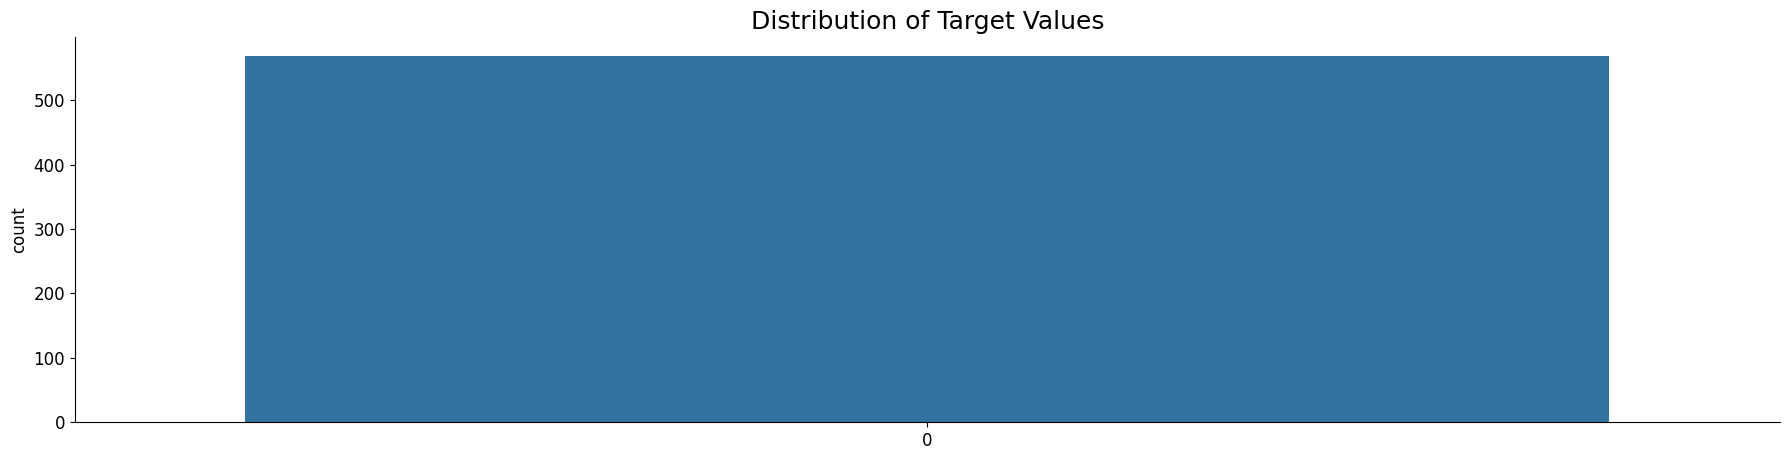

In [9]:
sns.countplot(df['target'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Distribution of Target Values', fontsize=18)
plt.show()

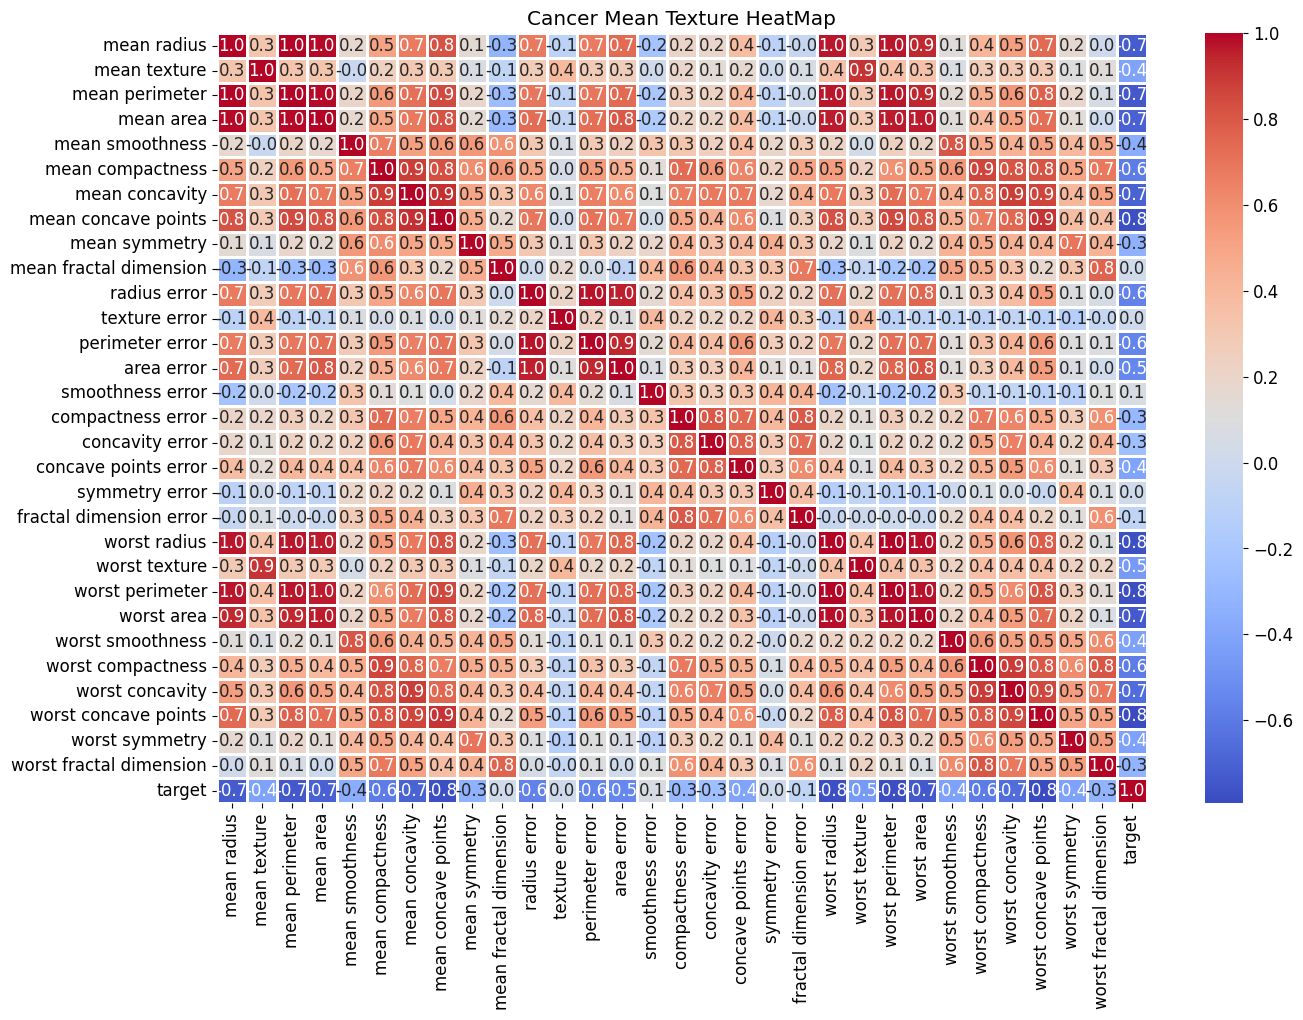

In [10]:
correlation_matrix = df.corr()
#Grafik 1.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.8, fmt='.1f')
plt.title("Cancer Mean Texture HeatMap")
plt.show()

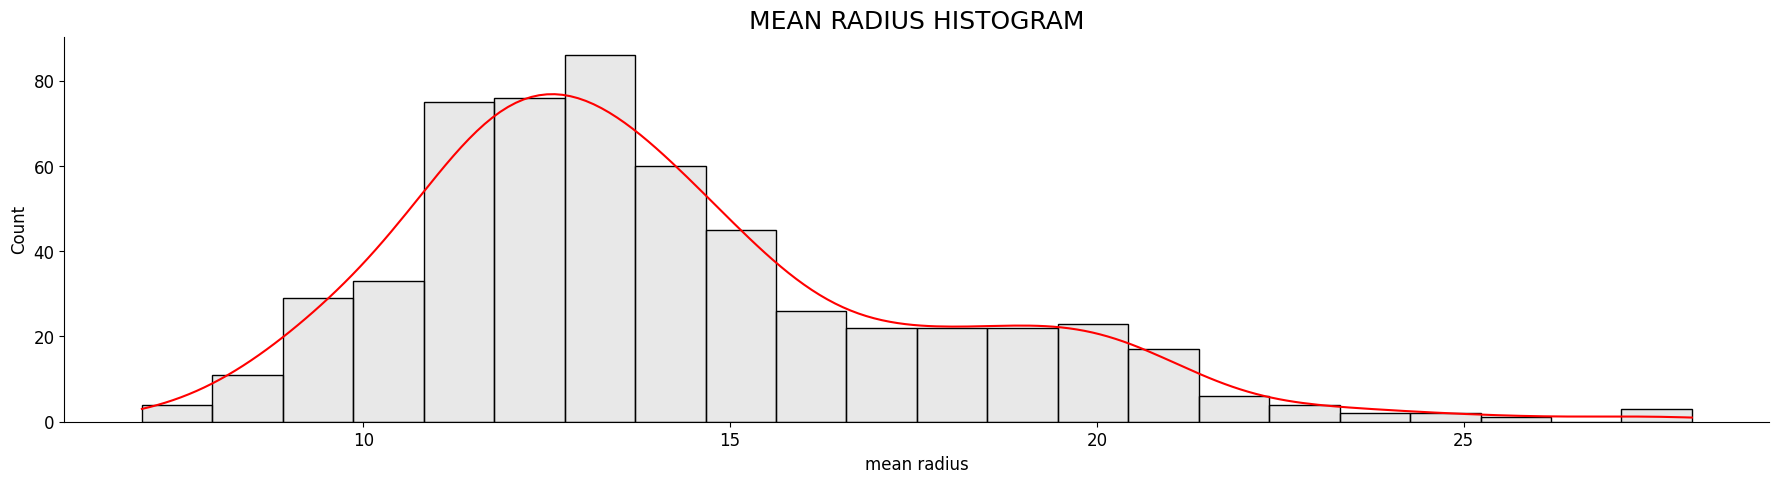

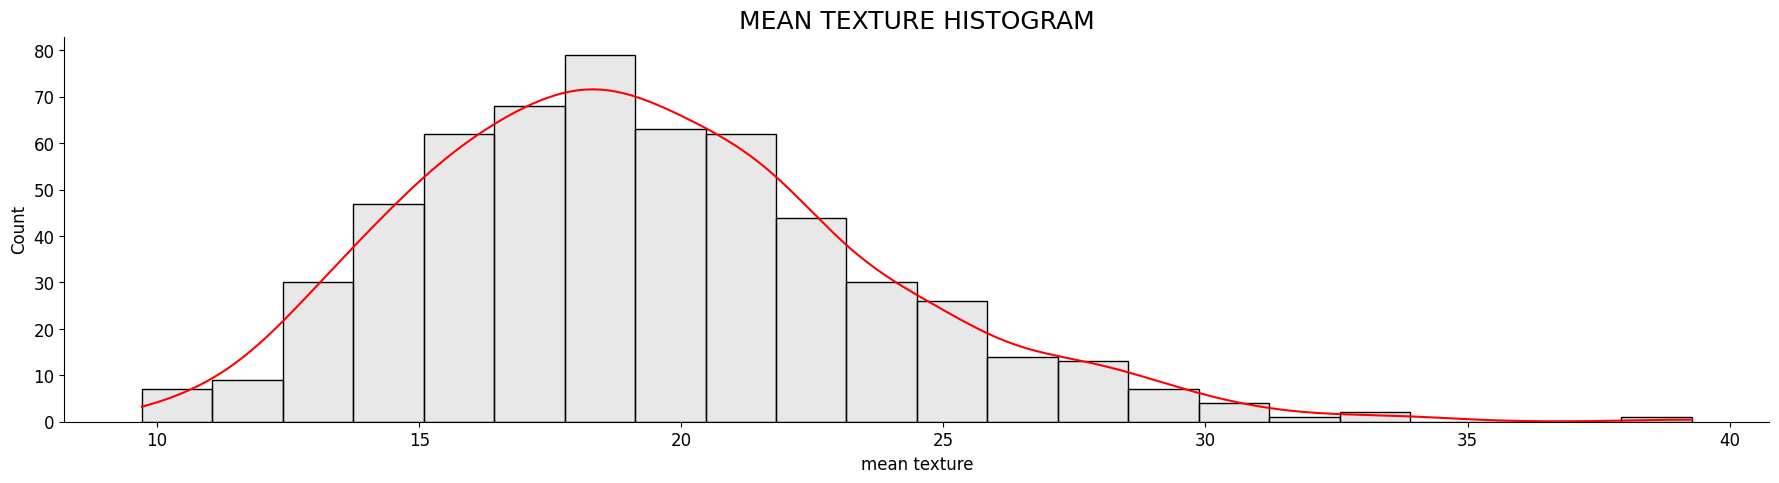

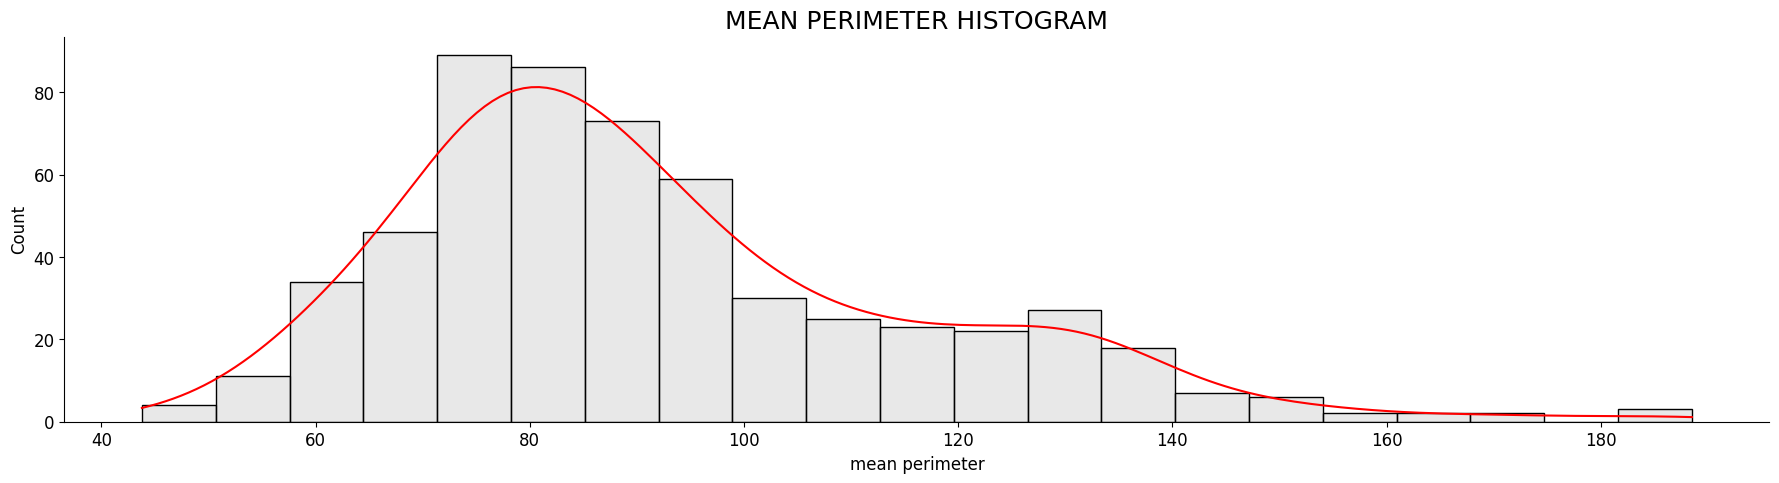

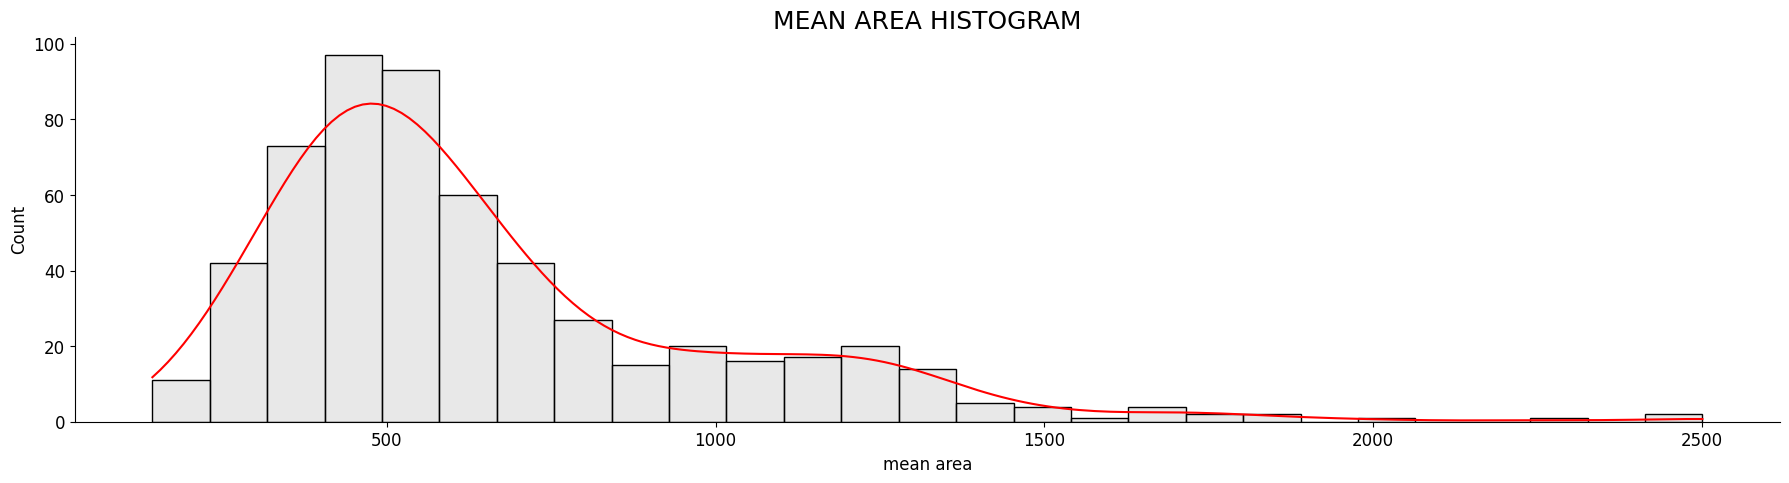

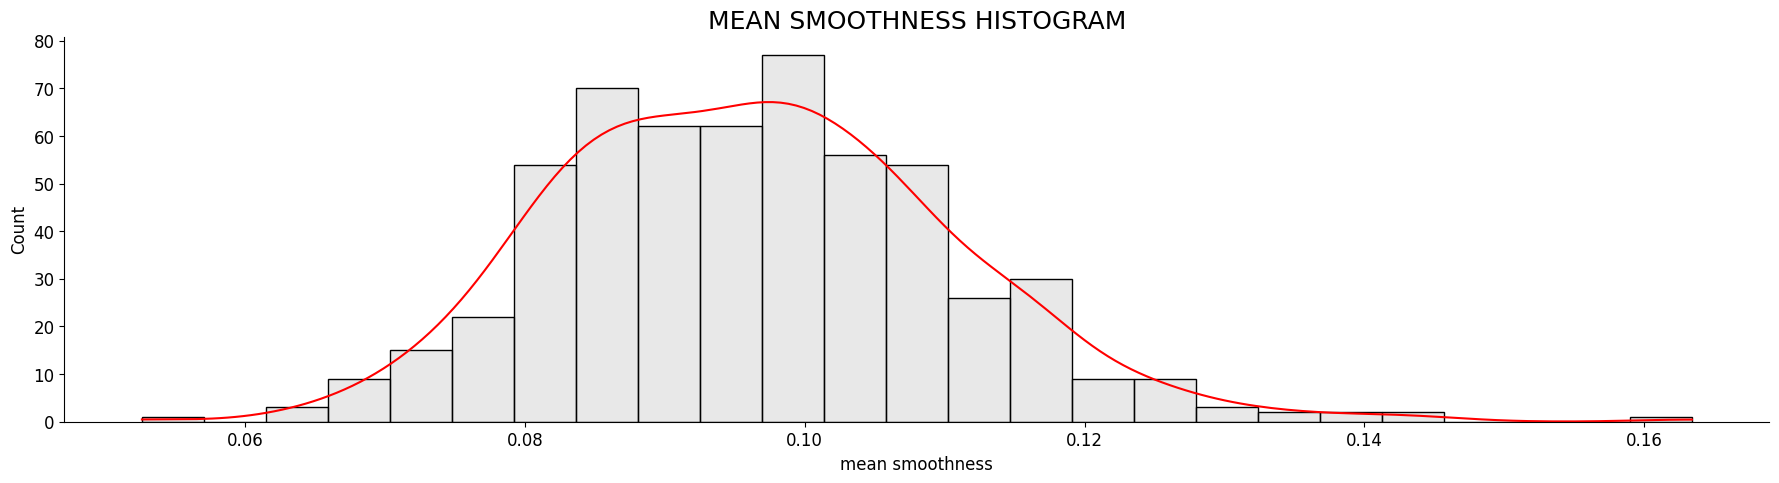

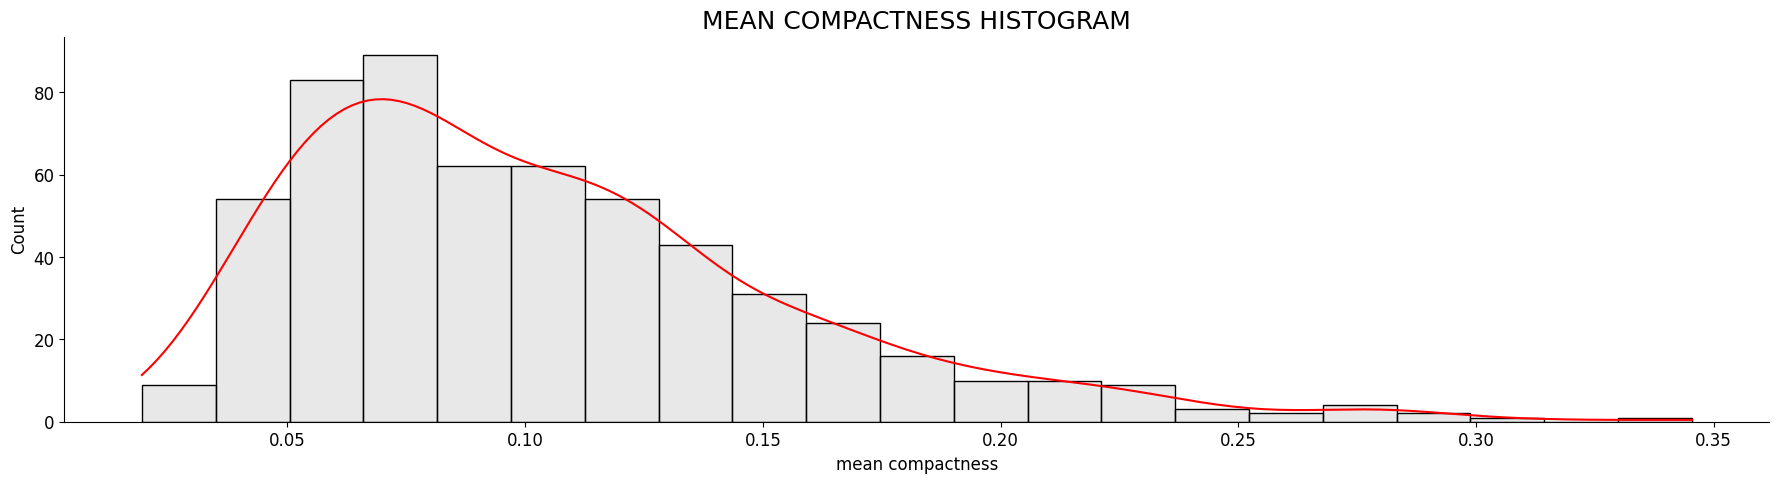

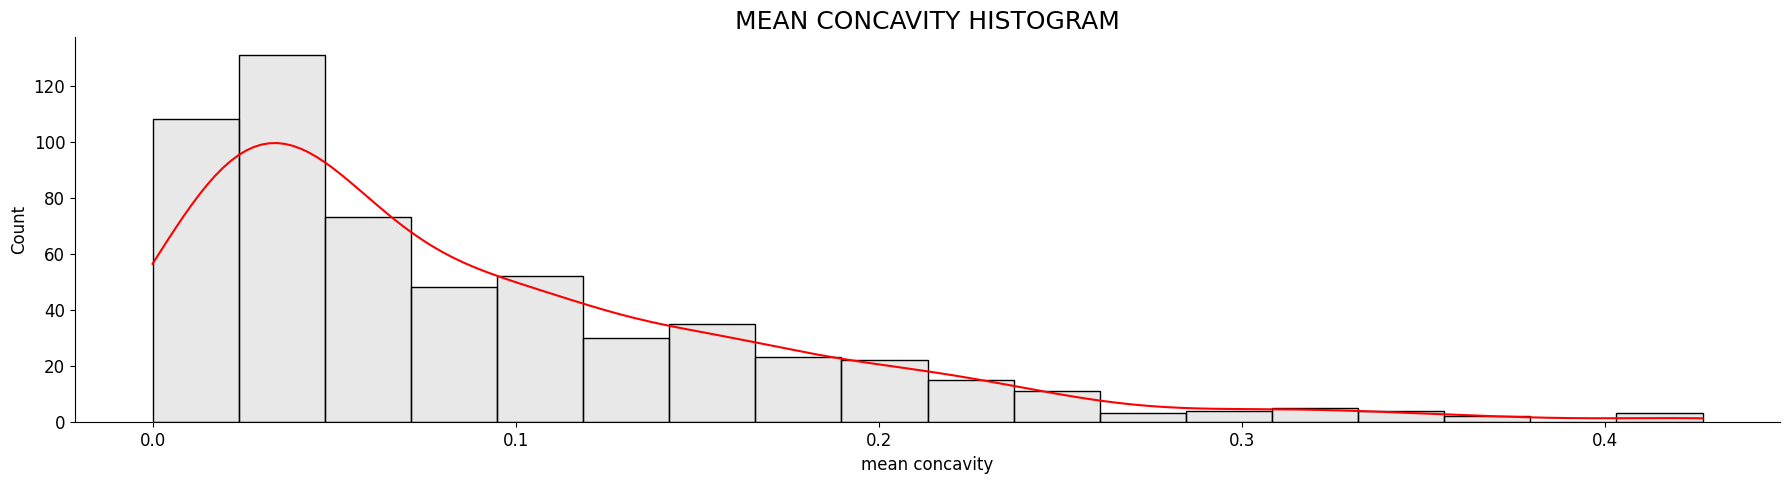

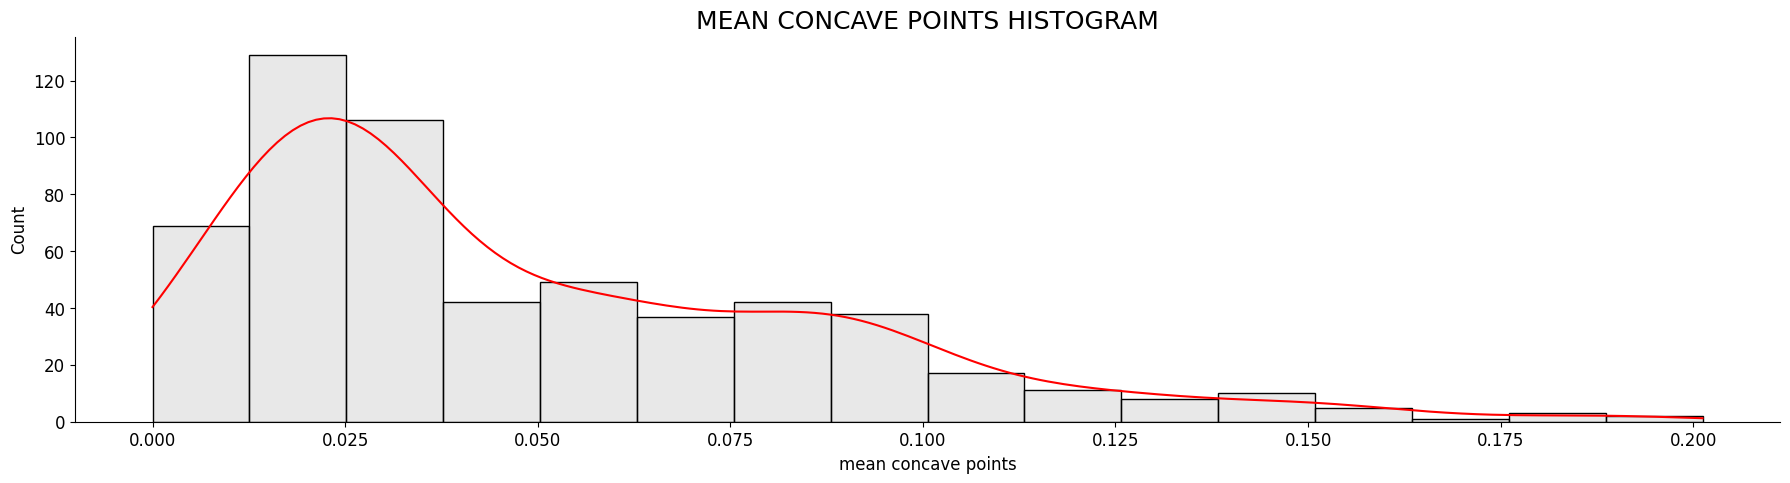

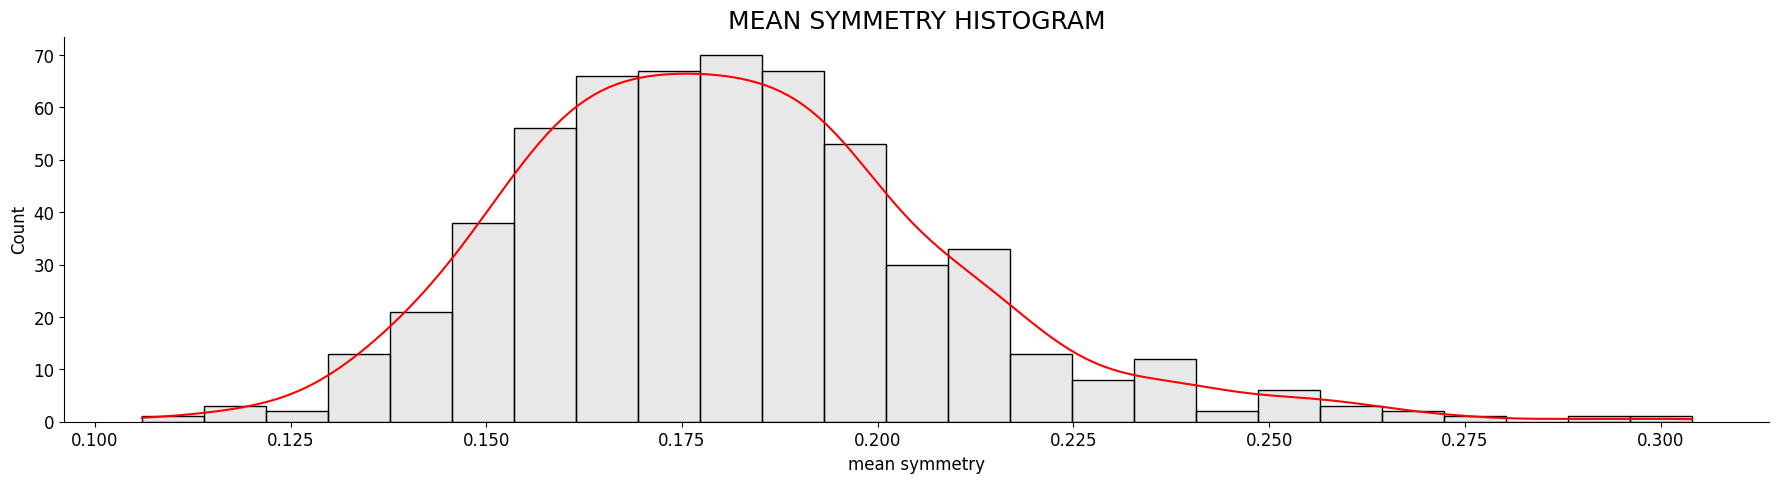

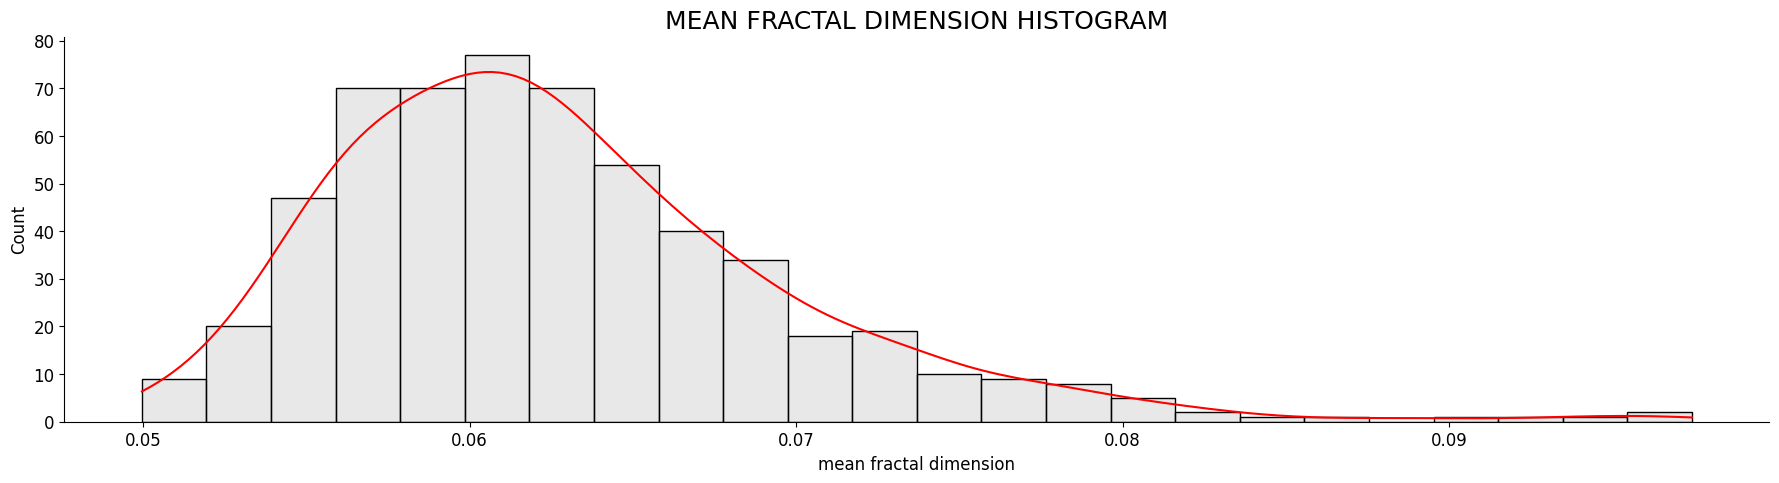

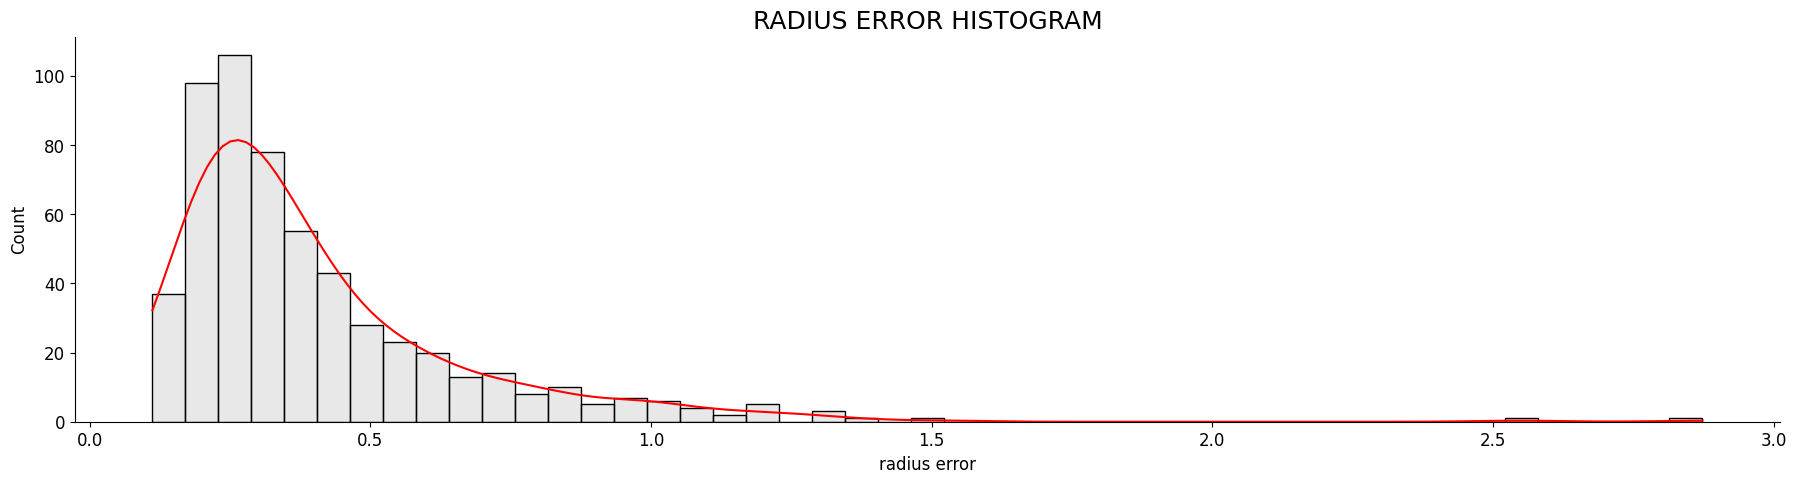

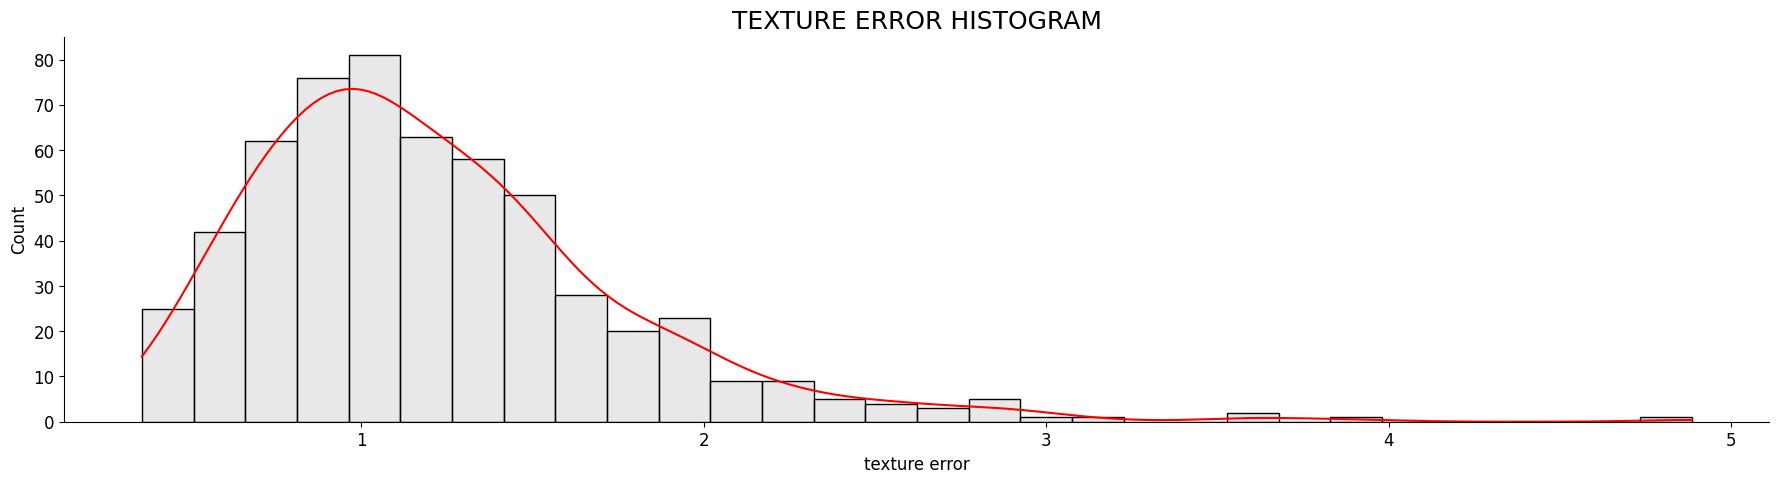

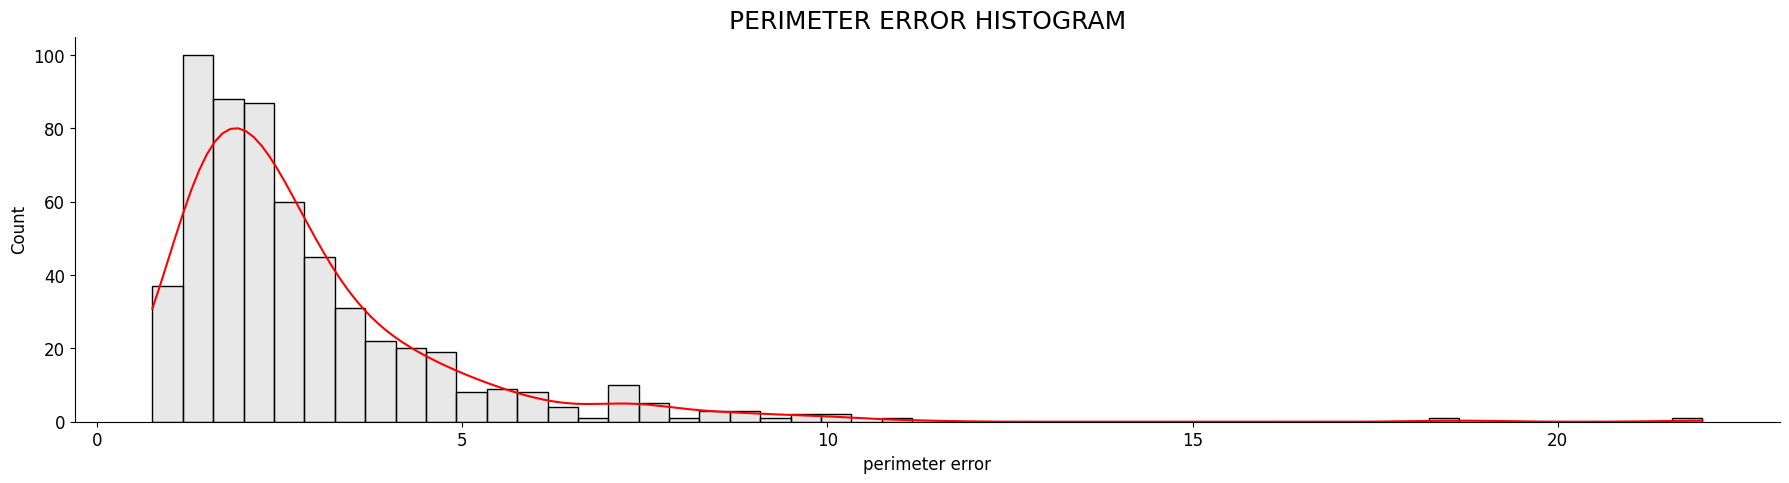

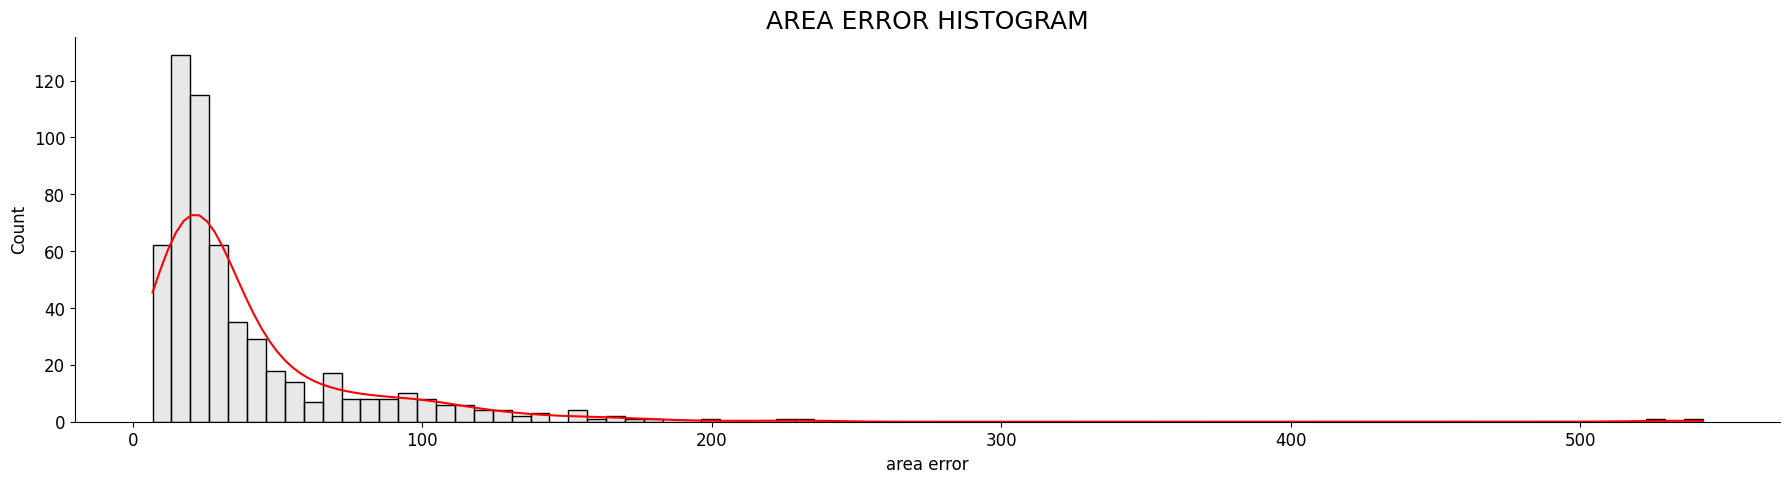

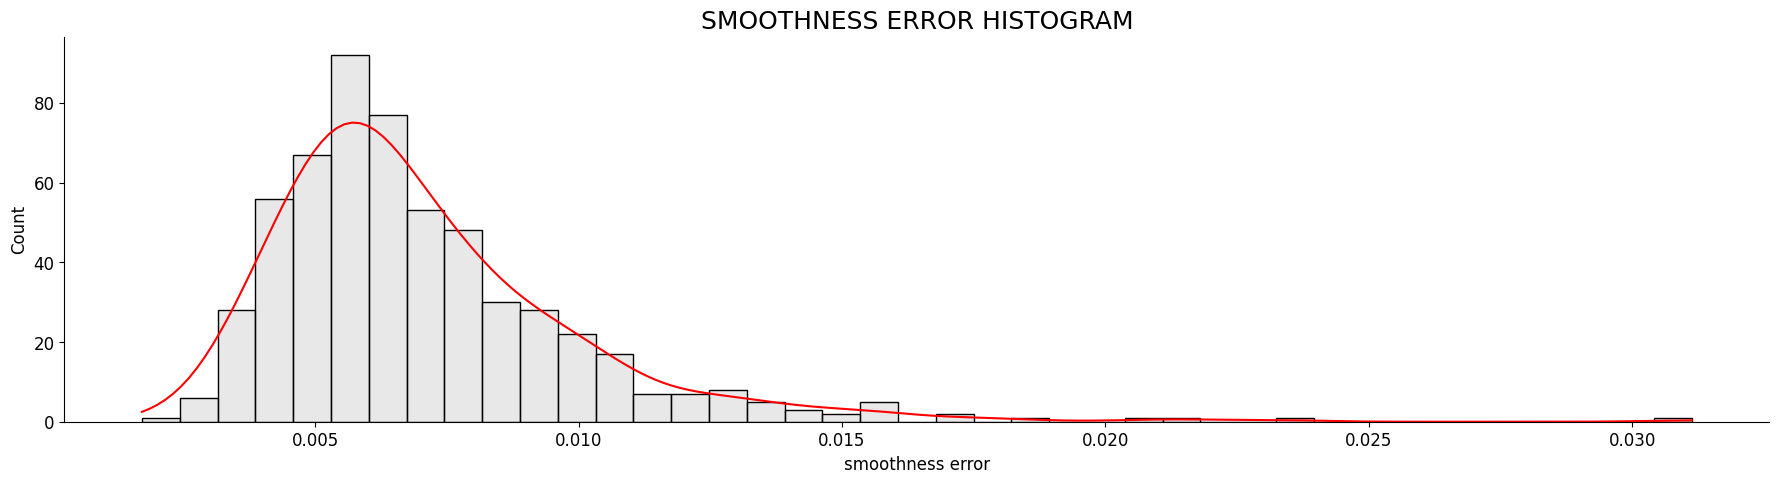

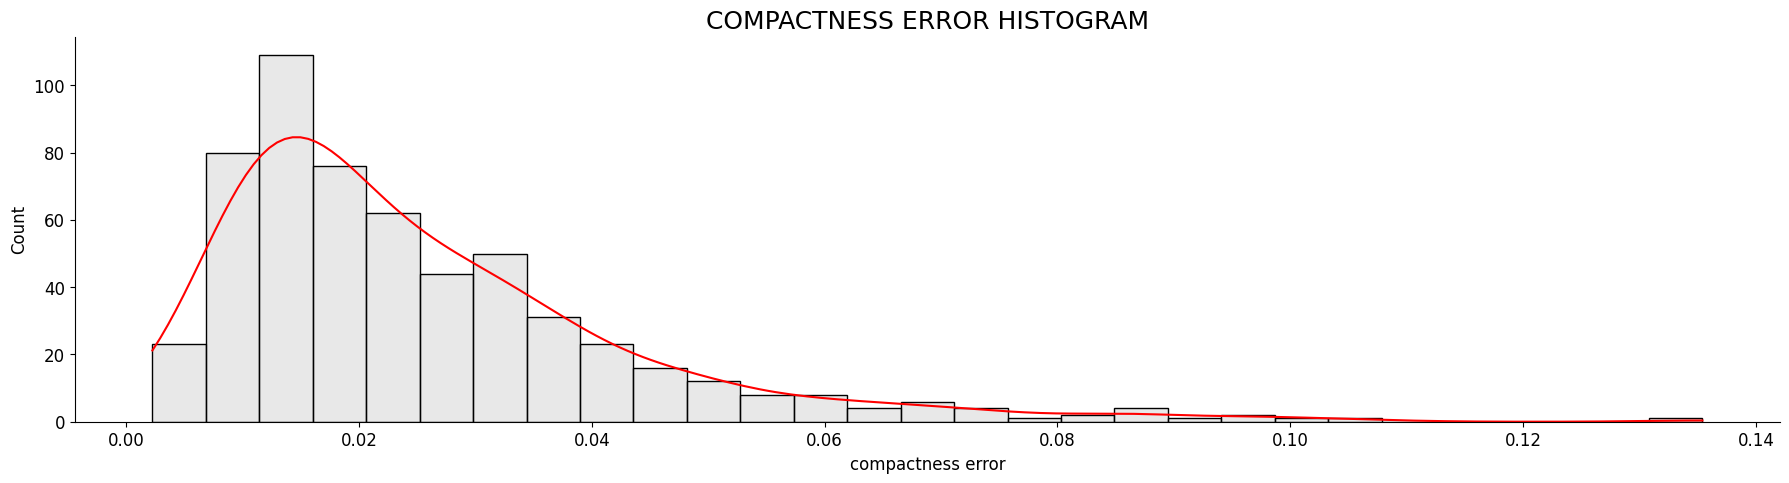

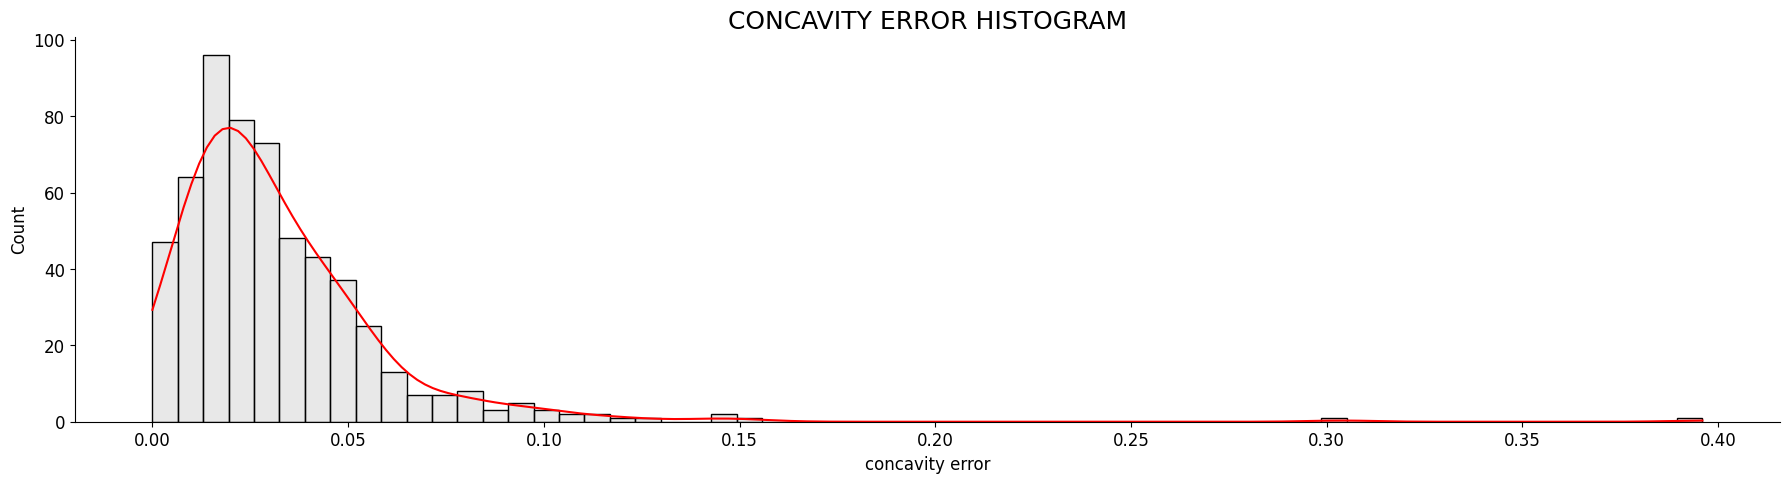

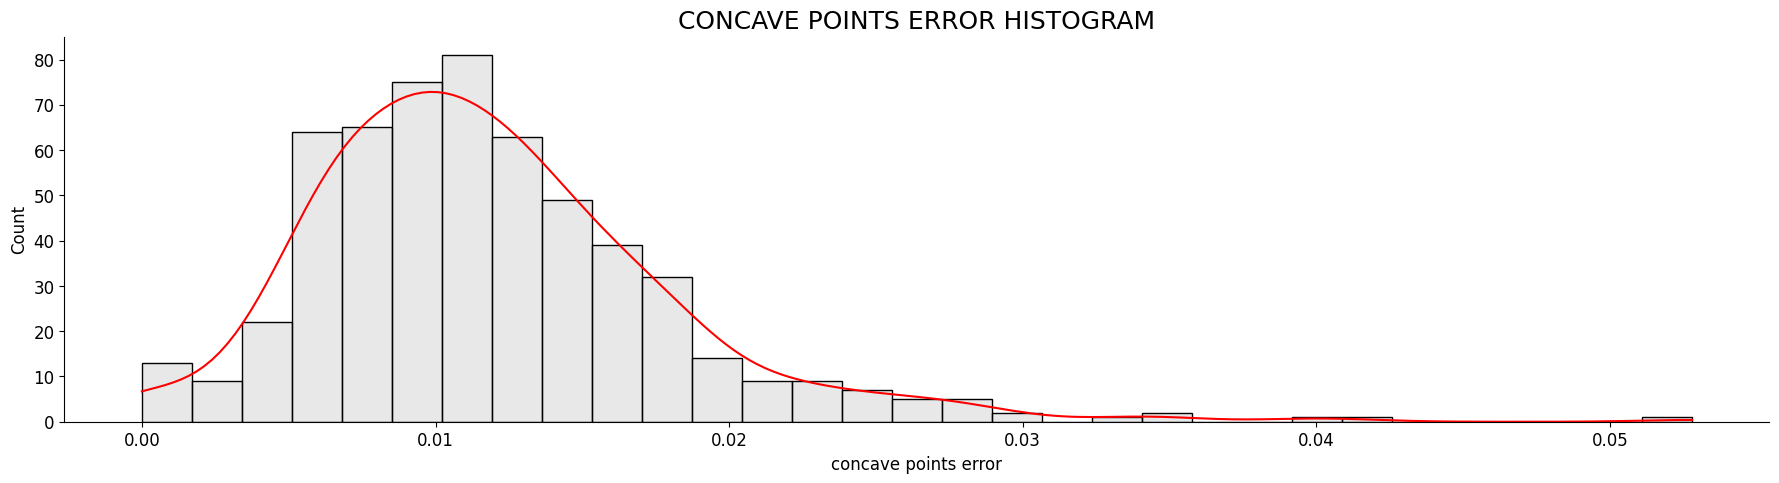

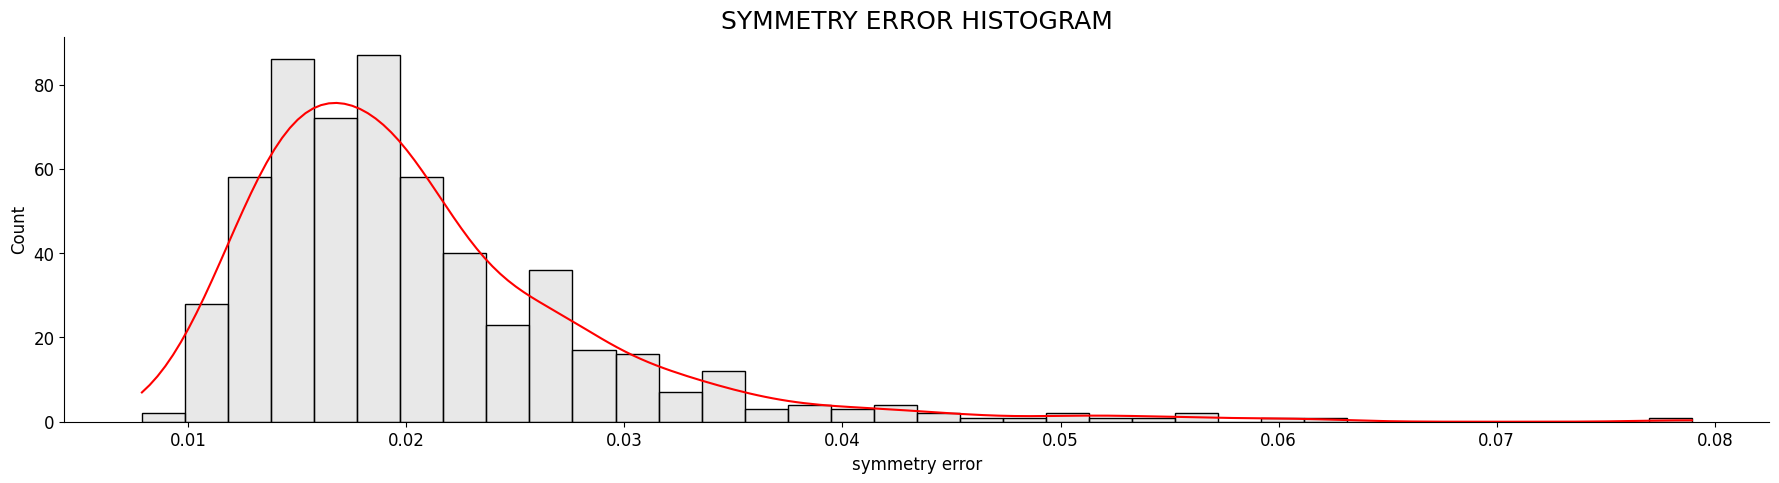

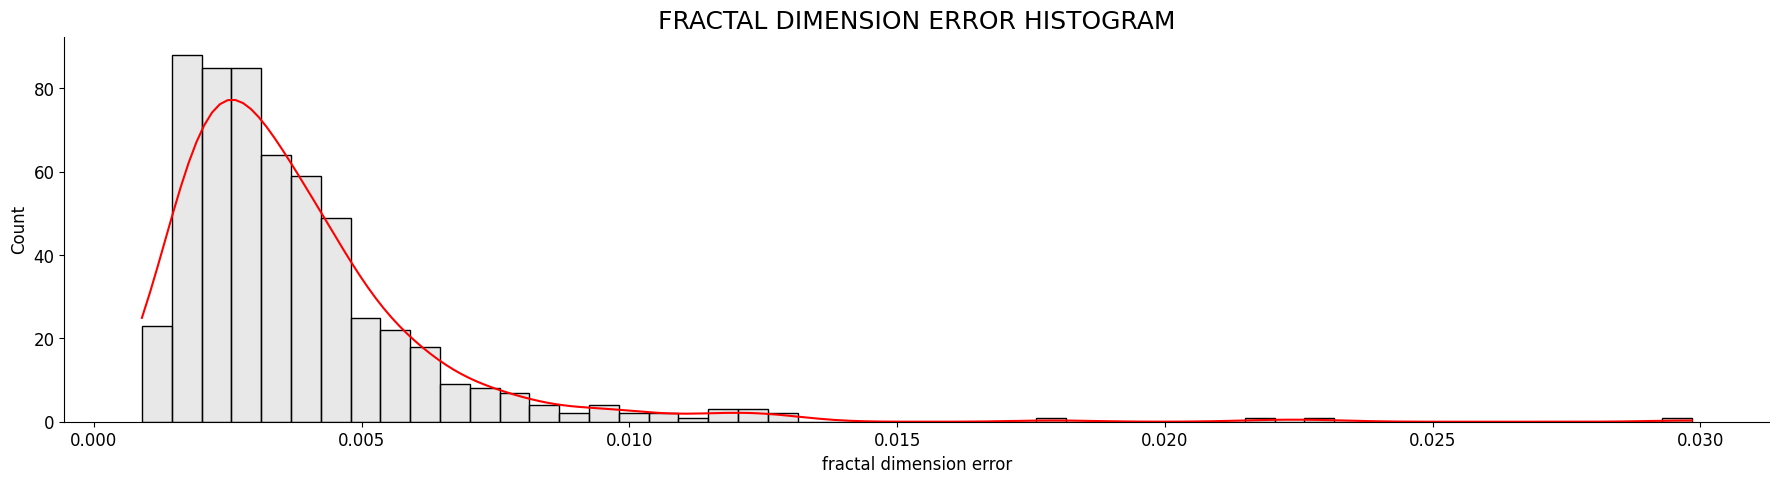

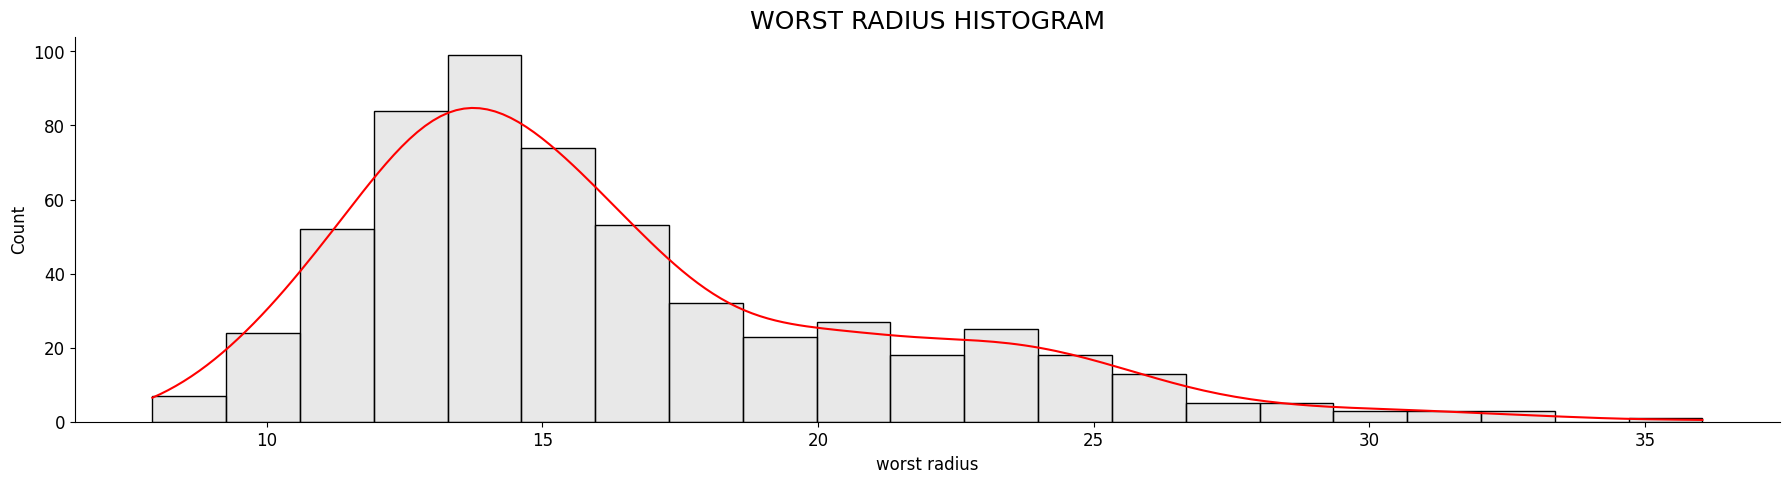

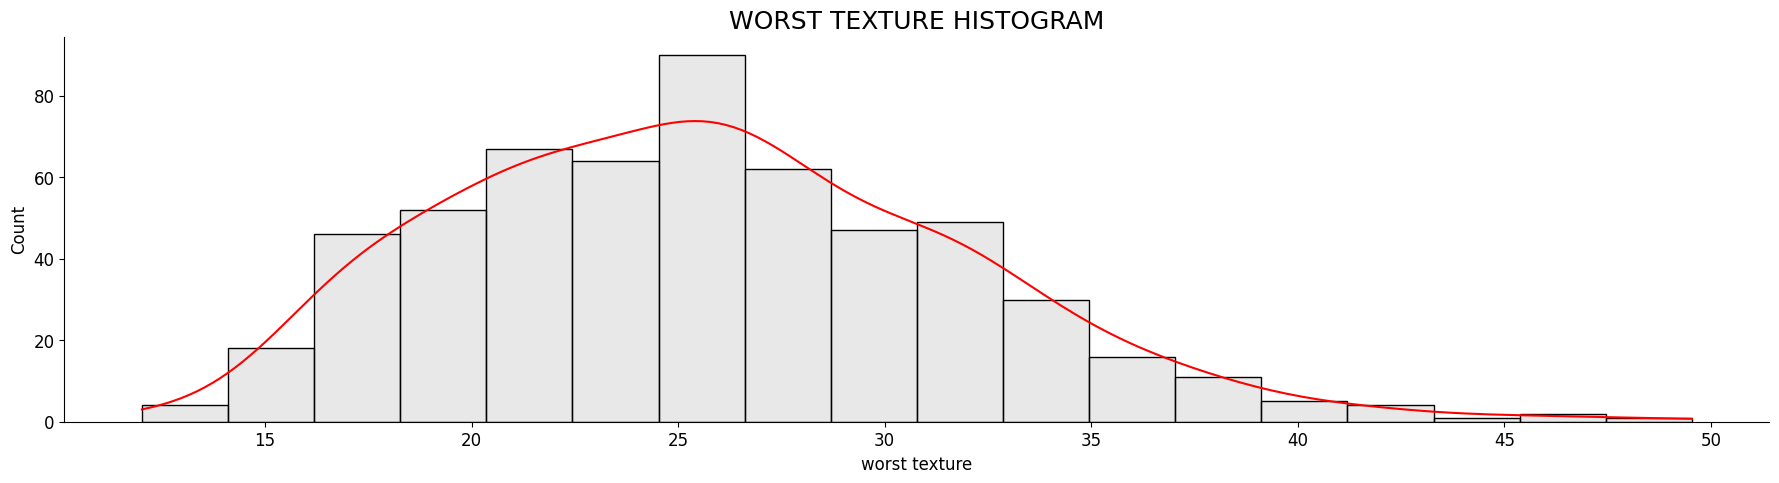

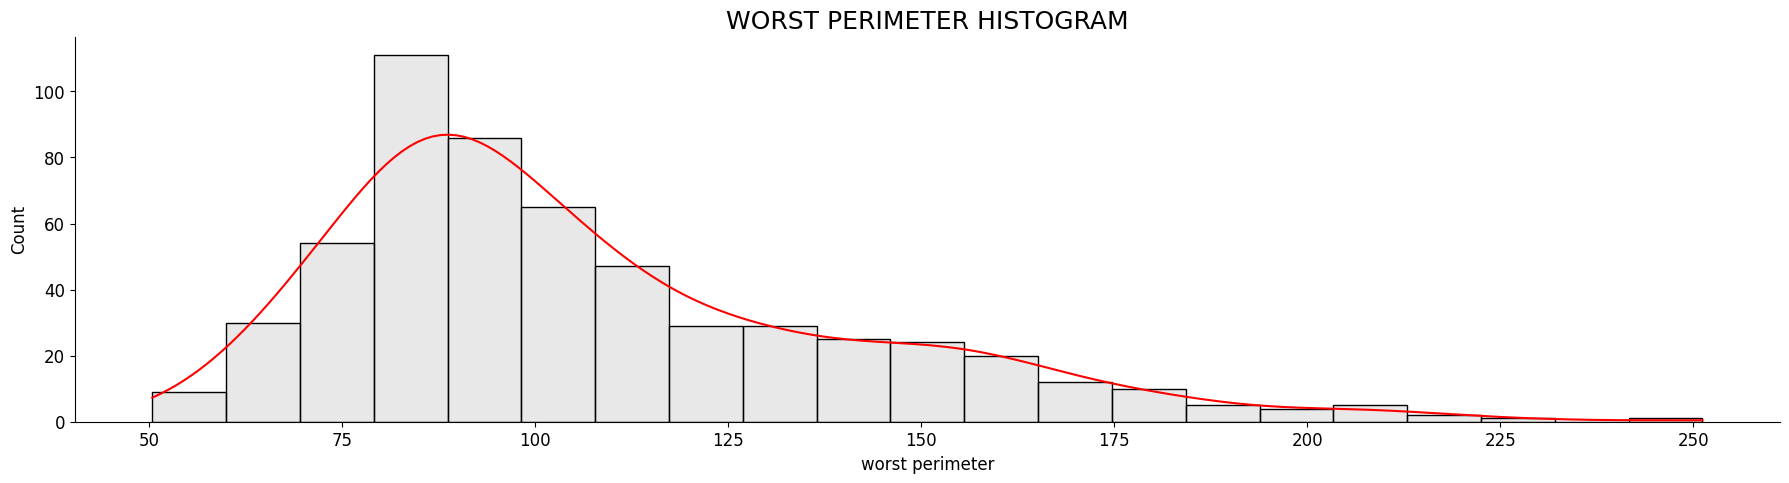

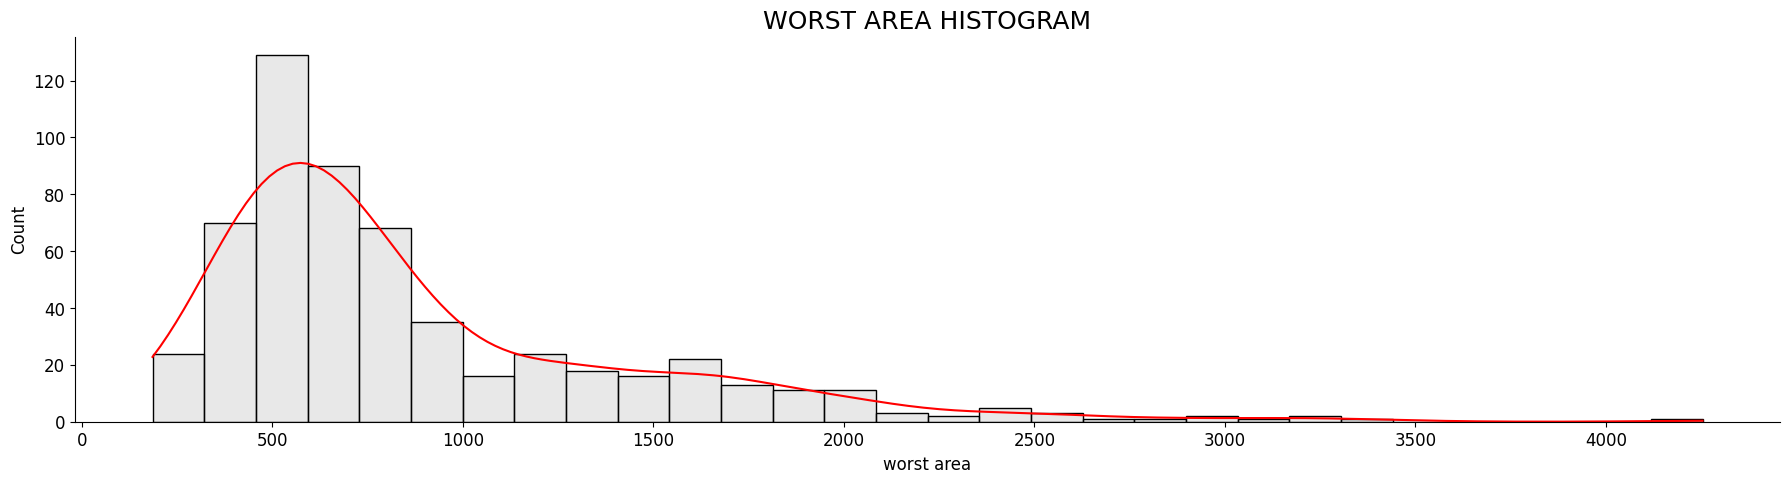

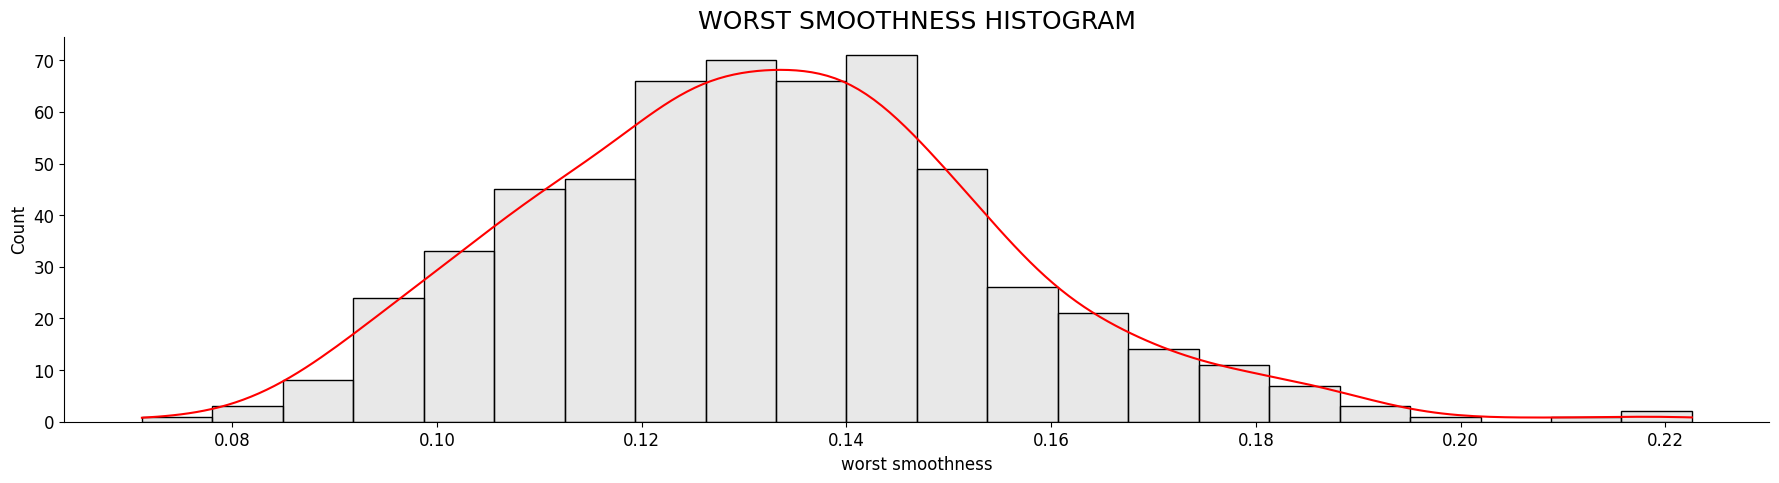

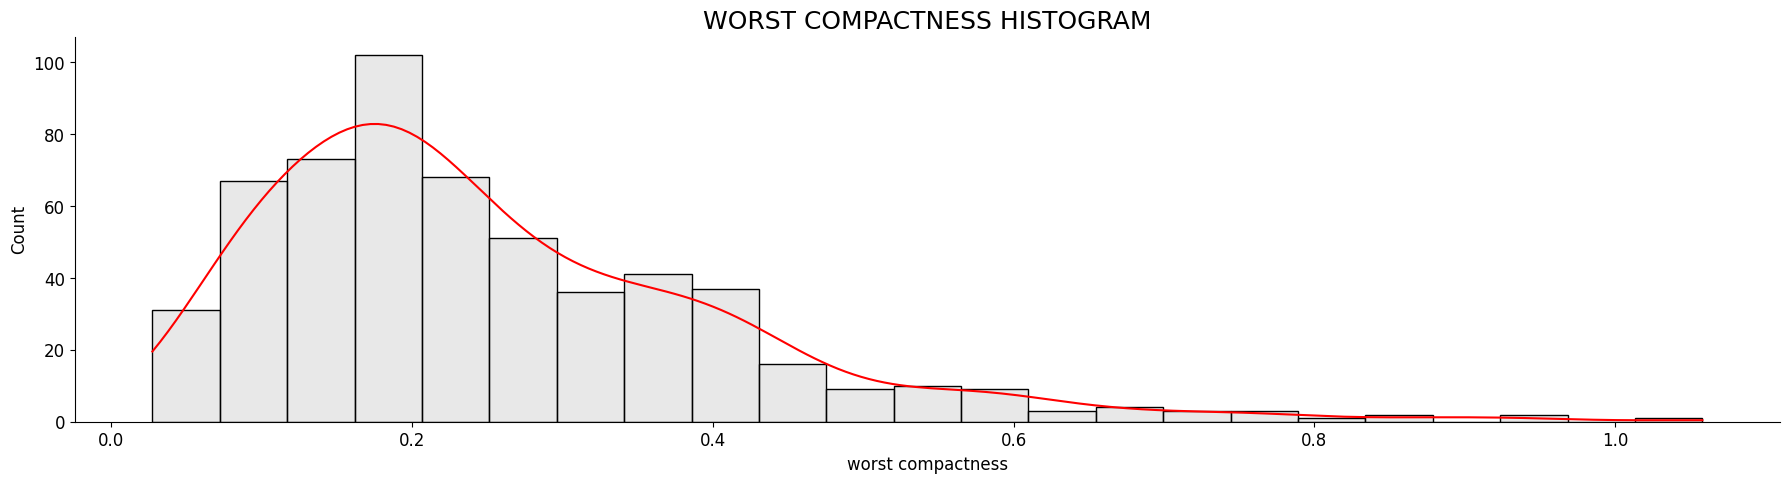

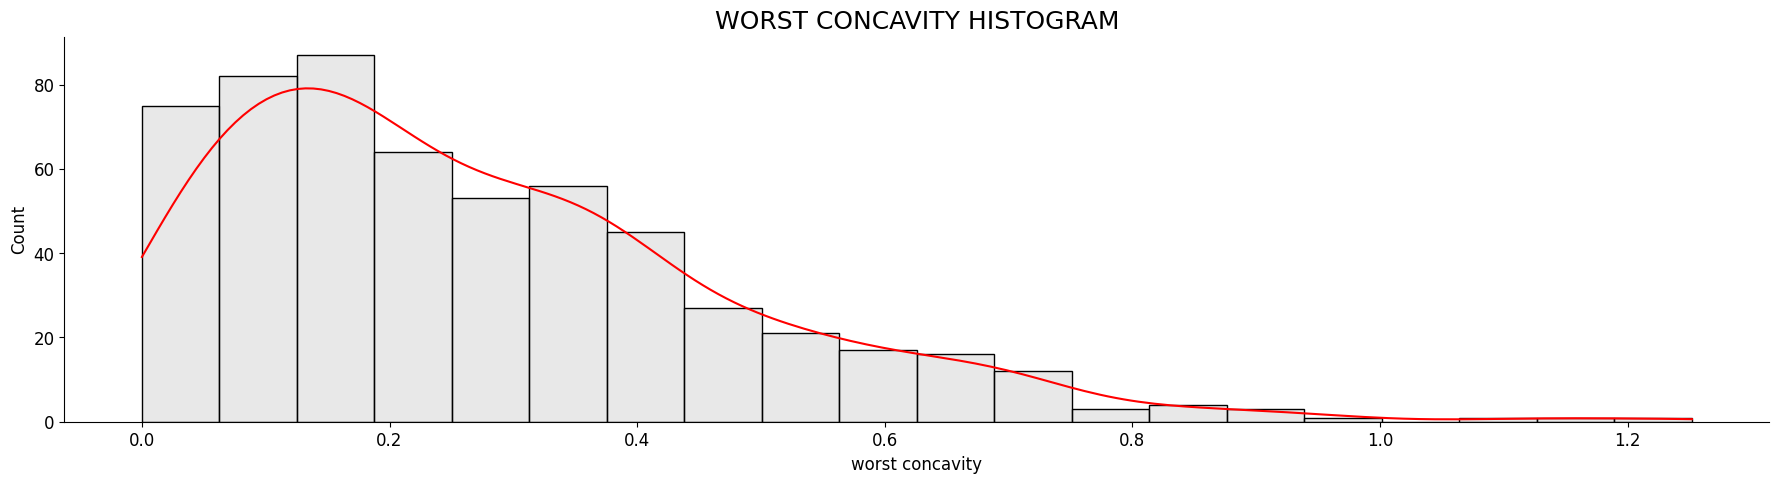

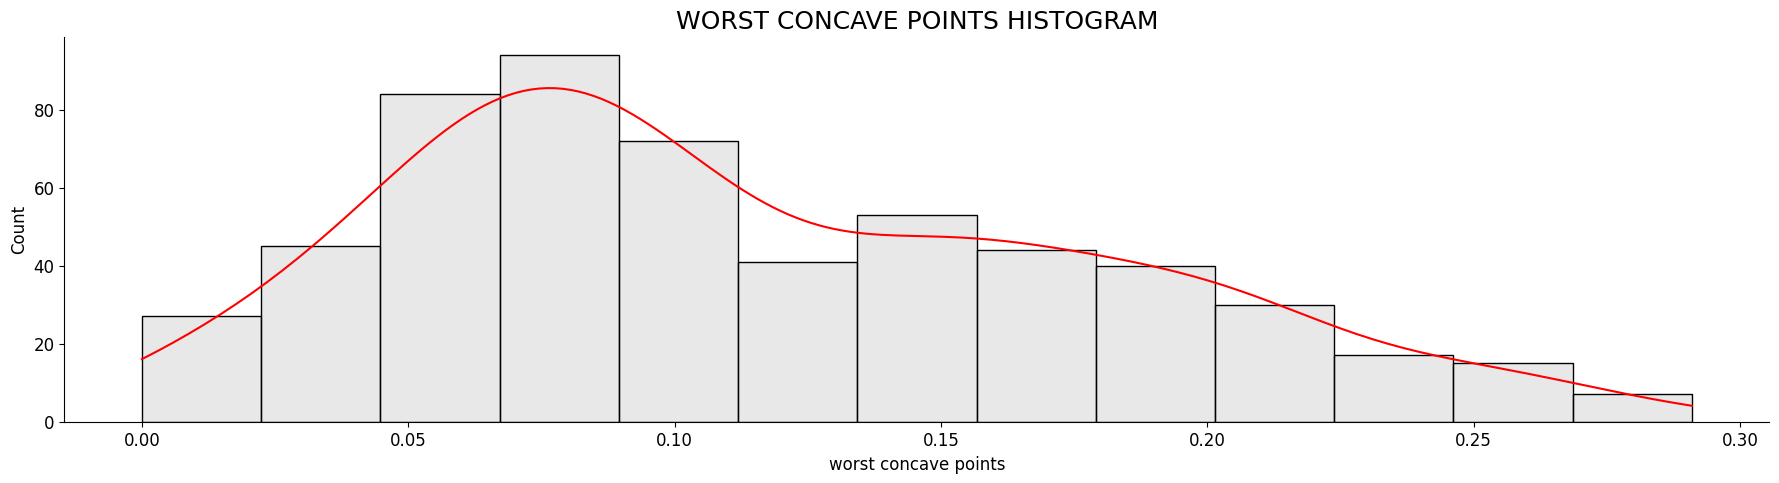

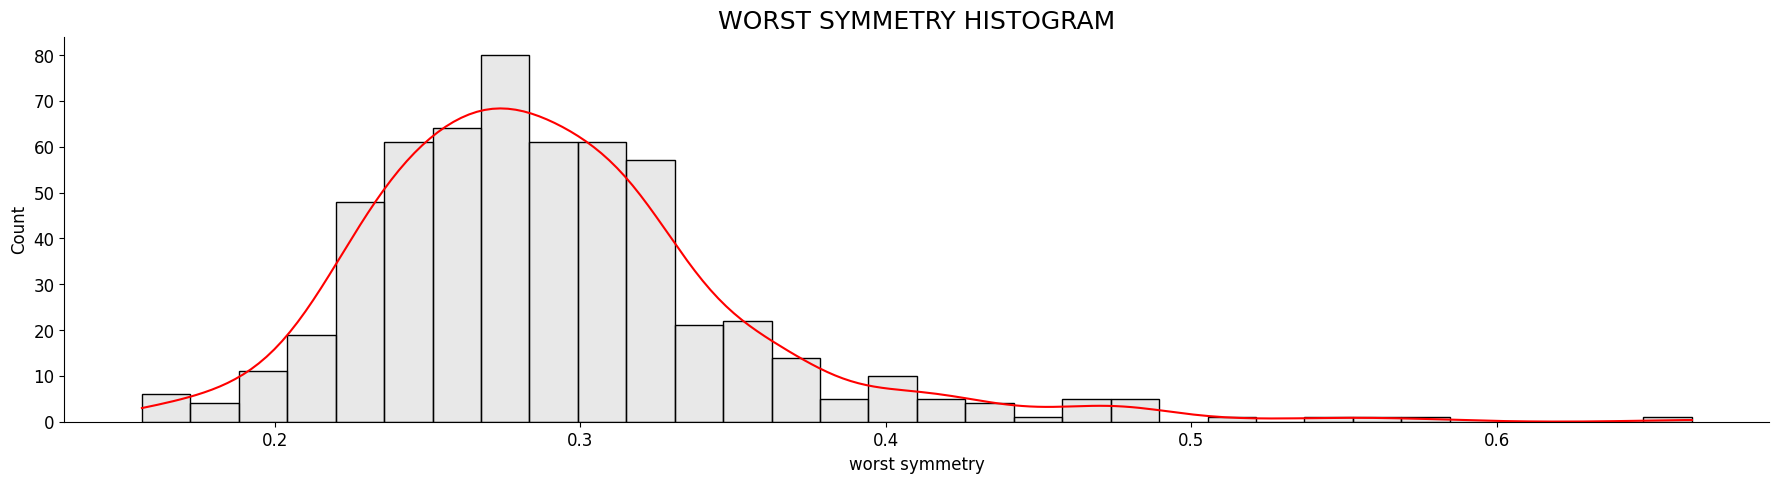

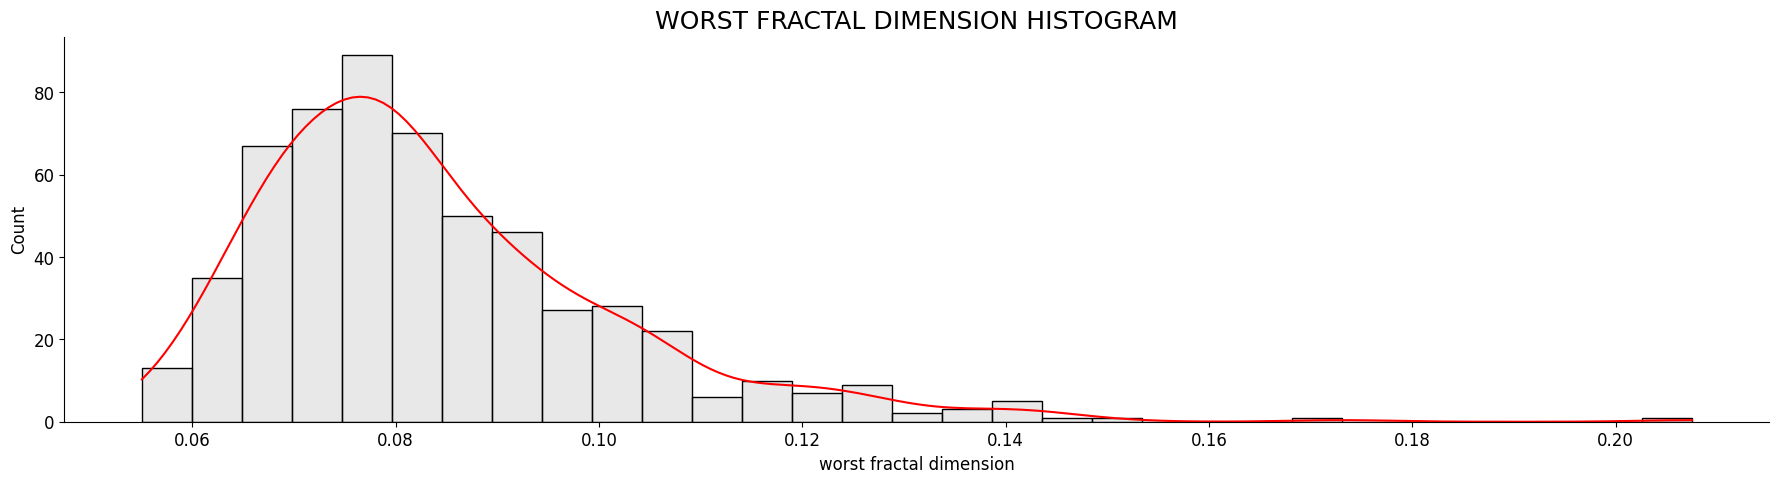

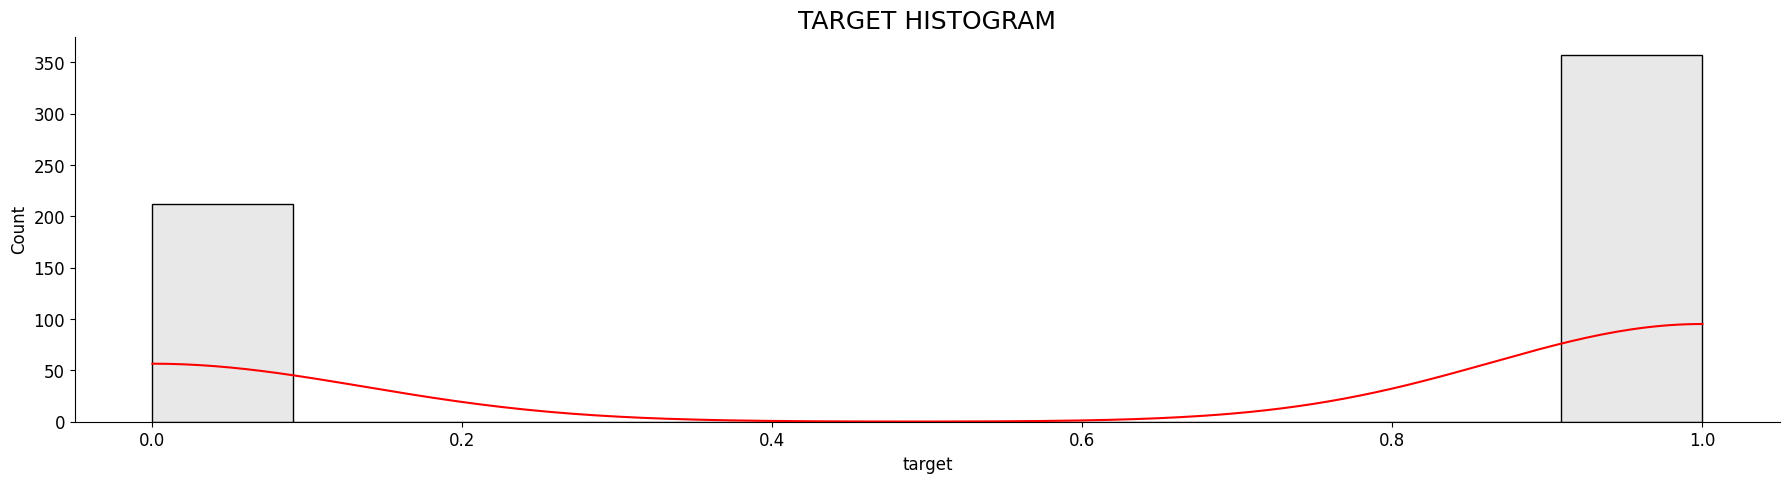

In [11]:
for i in df.columns:
    ax = sns.histplot(df, x=i, kde=True, color='lightgray')
    ax.lines[0].set_color('red')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.title(i.upper() + ' HISTOGRAM', fontsize=18)
    plt.show()

What's the spread of Mean Texture?

In [12]:
fig = px.scatter(df,
                 x = 'mean texture',
                 color ='target',
                 size ='mean texture',
                 template = 'simple_white',
                 title = 'Cancer Mean Texture Spread',
                 labels ={"mean texture": "Mean Texture", "target":"Target"},
                 hover_data=["target"])
fig.update_layout(xaxis_title= "Mean Texture", yaxis_title="")

fig.show()

In [13]:
fig = px.scatter(df,
                 x="mean compactness",
                 size="mean compactness",
                 color="mean compactness",
                  labels={"mean compactness": "Mean Compactness"},
                 hover_data=["target"],
                 template='simple_white',
                 title="Cancer Compactness Mean")
fig.update_layout(xaxis_title="Mean Compactness",yaxis_title=" ")
fig.show()

In [14]:
fig = px.scatter(df,
                 x="symmetry error",
                 size='symmetry error',
                 color = 'symmetry error',
                 hover_data=["target"],
                 template='seaborn',
                 labels={"symmetry error": "Symmetry Error"},
                 title="Symmetry Error Spread")
fig.update_layout(xaxis_title="Symmetry Error",yaxis_title=" ")
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)'})
fig.show()

In [15]:
fig = px.scatter(df,
                 x="mean concave points",
                 size='mean concave points',
                 color="mean concave points",
                 hover_data=["target"],
                 template="simple_white",
                 labels={"mean concave points": "Mean Concave Points"},
                 title="Mean Concave Points Spread")
fig.update_layout(xaxis_title="Mean concave points",yaxis_title=" ")
fig.show()

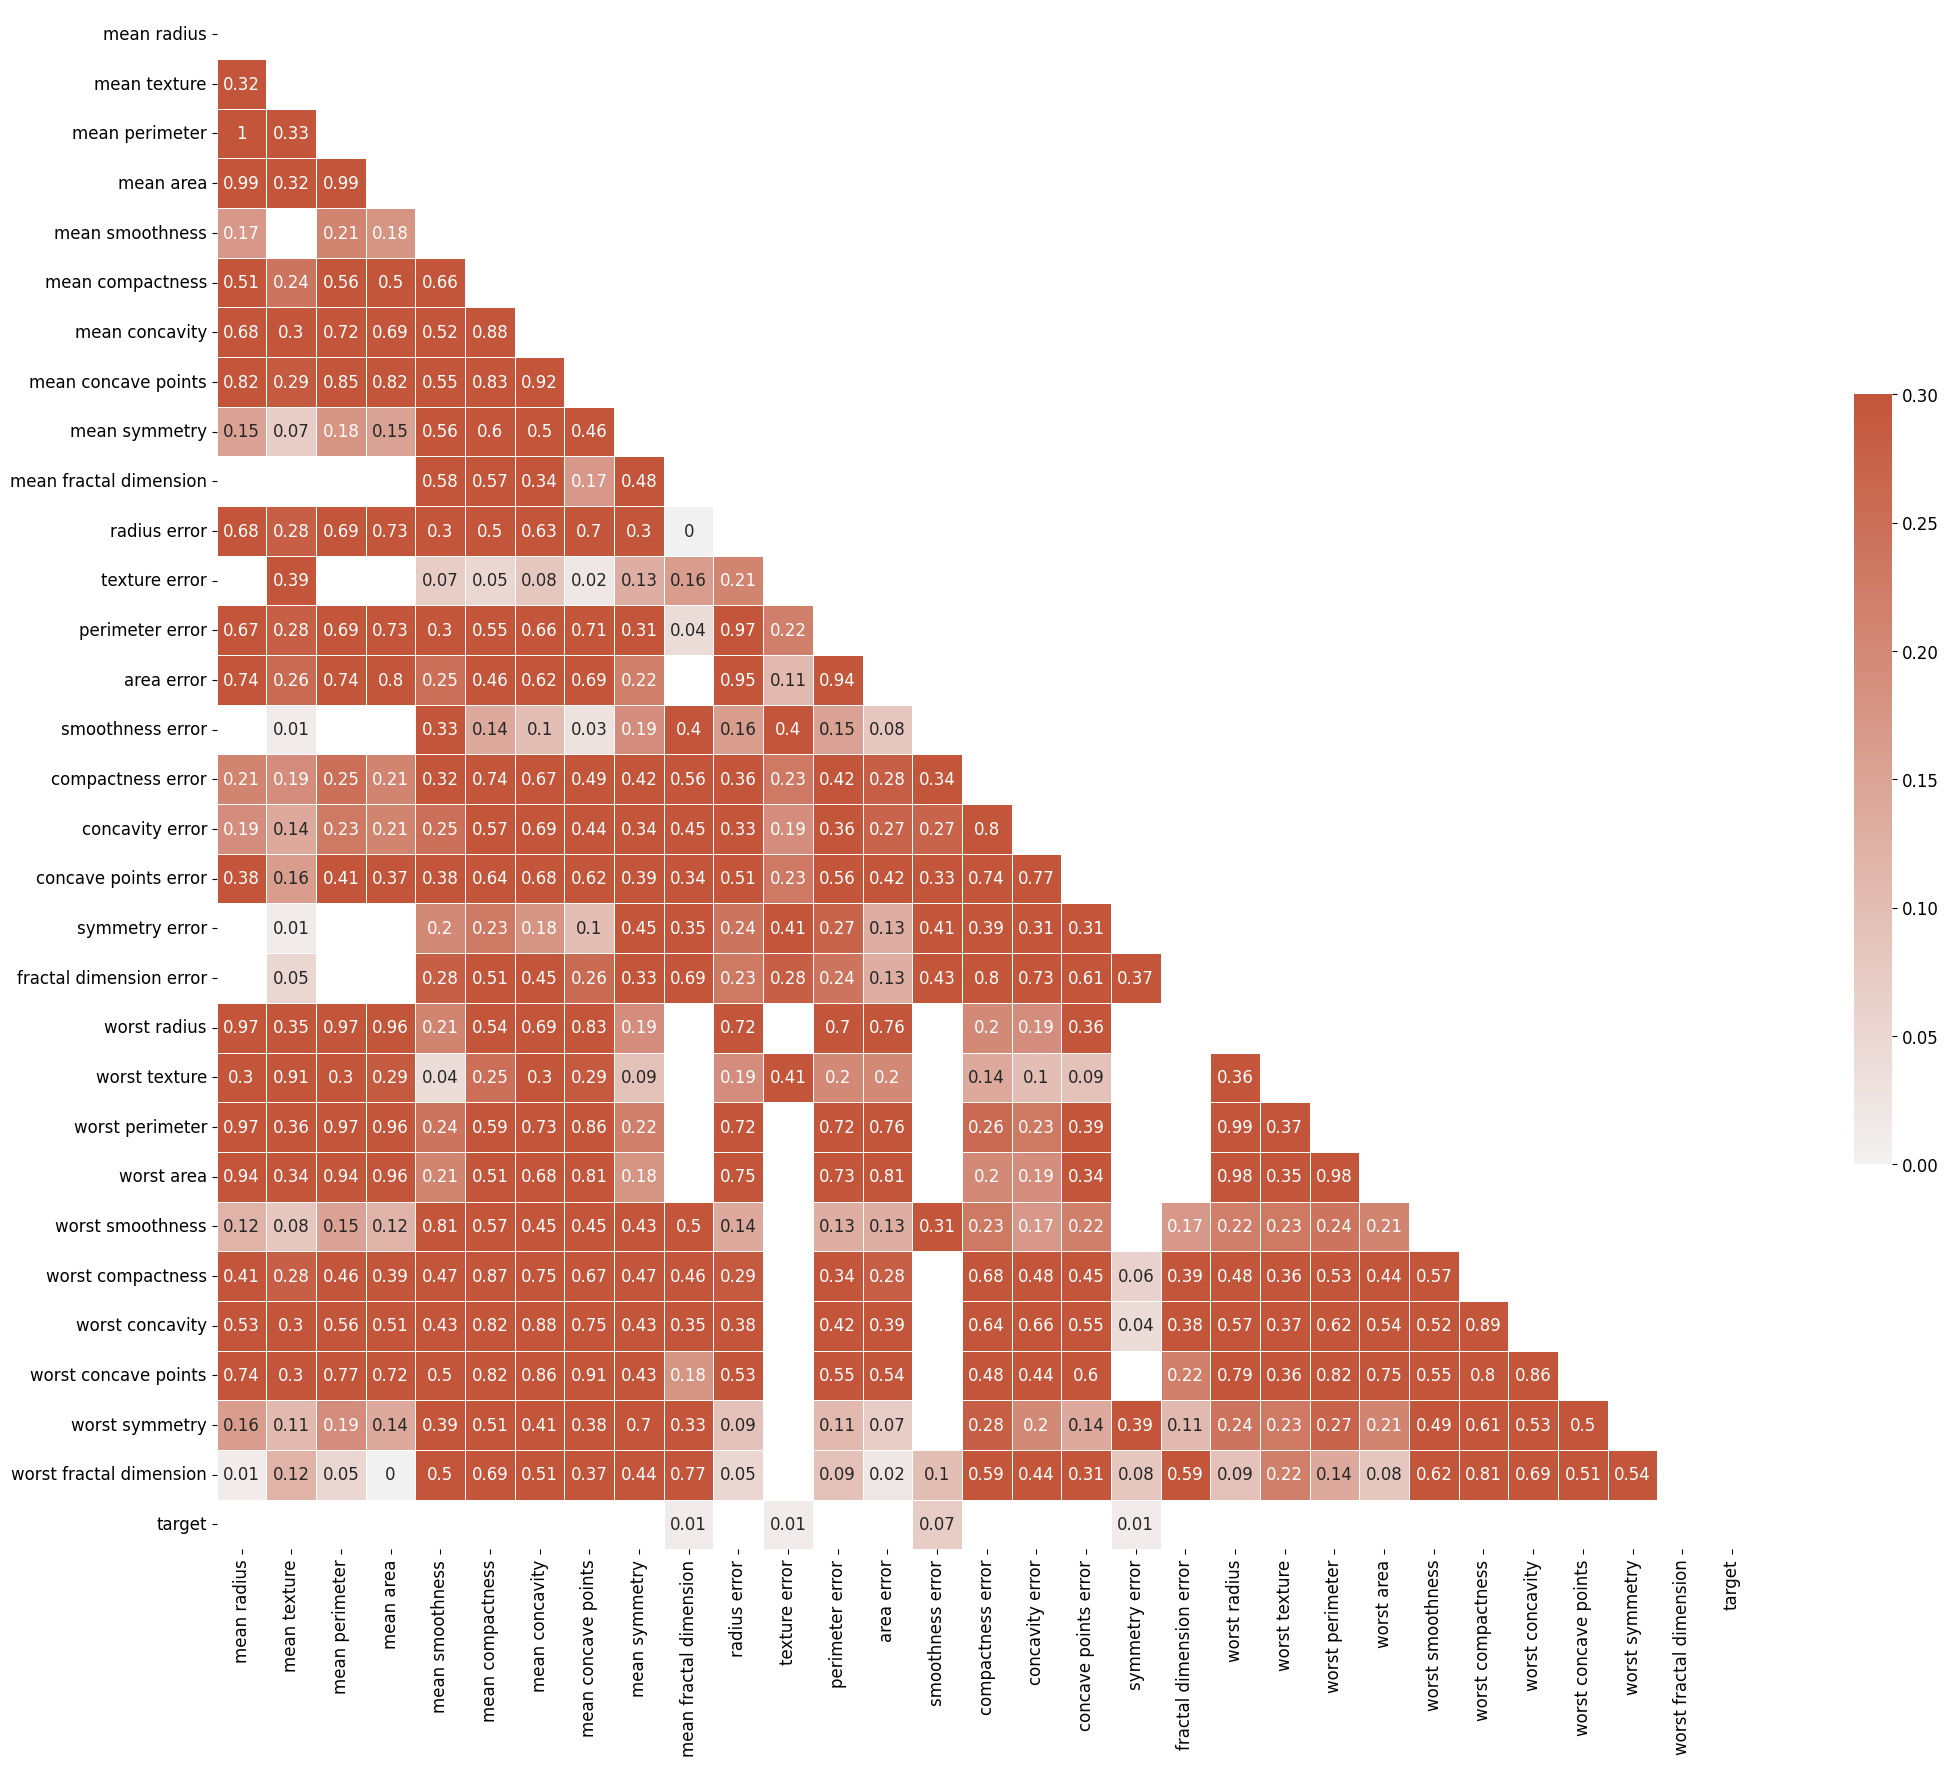

In [16]:
#Correlation Heatmap showing only those values that have a positive correlation
corr = df.corr()
corr = np.around(corr[corr > 0.0],2)                #filters out any negative correlation
mask = np.triu(np.ones_like(corr, dtype=bool))      #Gets rid of the other triange in the heatmap
f, ax = plt.subplots(figsize=(25,20))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.show()

In [17]:
input_cols = df.columns[:-1]
input_cols

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [18]:
target_col = df.columns[-1]
target_col

'target'

In [19]:
inputs_df = df[list(input_cols)].copy()
inputs_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [20]:
targets = df[(target_col)]
targets

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [21]:
scaler = MinMaxScaler()
scaler.fit(inputs_df[input_cols])
inputs_df[input_cols] = scaler.transform(inputs_df[input_cols])
inputs_df[input_cols].head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


**PCA**

In [22]:
#Extracting input values
column_values = []
for i in range(len(inputs_df.columns)):
    column_values.append(inputs_df.iloc[:,i].values)

#Making Covariance Matrix
covariance_matrix = np.cov(column_values)

#Getting the EigenVectors and the EigenValues
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [25]:
#First Element of the Covariance Matrix
covariance_matrix[0]

array([ 0.027818  ,  0.00785484,  0.02794603,  0.02458229,  0.00361231,
        0.01367458,  0.02108345,  0.02645754,  0.00341174, -0.00772894,
        0.01137405, -0.00197887,  0.01071215,  0.01042819, -0.00378944,
        0.00462112,  0.00246906,  0.0073333 , -0.00202383, -0.00065016,
        0.02780391,  0.00811481,  0.02693902,  0.02196388,  0.0030081 ,
        0.0105267 ,  0.01464405,  0.028038  ,  0.00333488,  0.00013961])

In [26]:
#First Eigenvector
eigen_vectors[0]

array([-2.42675774e-01, -2.61316697e-01, -5.95222384e-02,  3.94334569e-02,
       -5.88423544e-04,  2.07022394e-02,  2.42488690e-03, -4.38845905e-02,
        9.75085975e-02,  2.22769562e-01, -8.31524671e-02, -1.19734434e-01,
       -3.89565406e-02, -1.07972318e-01,  1.93030259e-01, -7.30164853e-02,
        2.97307938e-01, -1.47147813e-02,  3.38169231e-02, -4.54114194e-02,
        6.29772186e-02, -1.38267325e-01, -7.05072198e-01, -1.96766318e-01,
       -1.47132741e-01, -1.30574879e-01,  1.54107718e-01, -9.73681525e-02,
        5.86339157e-02, -5.57071438e-02])

In [27]:
print('The first eigen value is',round(eigen_values[0],4))

The first eigen value is 0.3313


In [28]:
explained_variance = []
c= 0
for i in range(len((eigen_values/(np.sum(eigen_values))*100))):
    c = c + np.around((eigen_values[i]/(np.sum(eigen_values))*100),3)
    while c < 92:
        explained_variance.append(c)
        print('At', i,'PC,', 'Explained Variance is',c)
        break

At 0 PC, Explained Variance is 53.098
At 1 PC, Explained Variance is 70.381
At 2 PC, Explained Variance is 77.495
At 3 PC, Explained Variance is 83.906
At 4 PC, Explained Variance is 87.992
At 5 PC, Explained Variance is 91.063


In [29]:
print('We have been able to achieve the', np.around(explained_variance[-1],4),
      'variance with just first', len(explained_variance),
      'elements hence we will have', len(explained_variance), 'PCs.')

We have been able to achieve the 91.063 variance with just first 6 elements hence we will have 6 PCs.


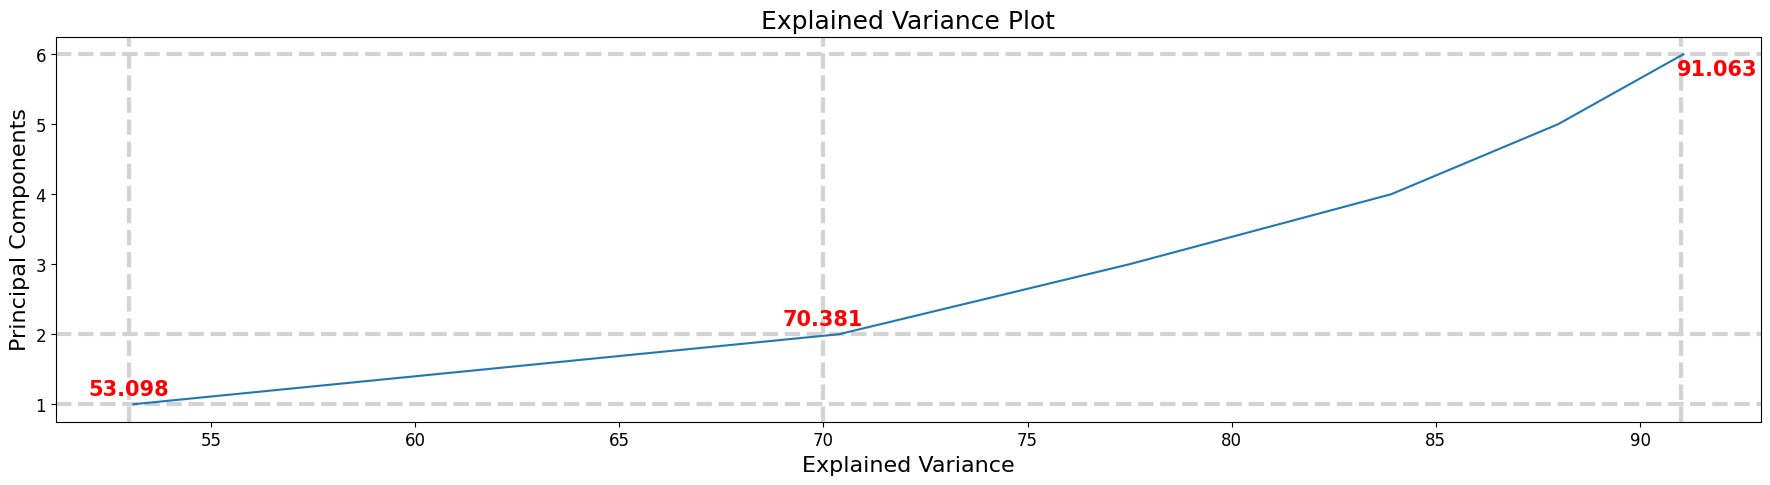

In [32]:
sns.lineplot(x=explained_variance,  y=range(1,len(explained_variance)+1))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.axhline(1, linestyle='--', lw=3, zorder=1, color='lightgray')
plt.axhline(2, linestyle='--', lw=3, zorder=1, color='lightgray')
plt.axhline(6, linestyle='--', lw=3, zorder=1, color='lightgray')
plt.axvline(53, linestyle='--', lw=3, zorder=1, color='lightgray')
plt.axvline(70, linestyle='--', lw=3, zorder=1, color='lightgray')
plt.axvline(91, linestyle='--', lw=3, zorder=1, color='lightgray')

plt.annotate(f'70.381', (69, 2.12), fontsize=15, fontweight='bold', color='red')
plt.annotate(f'53.098', (52, 1.12), fontsize=15,  fontweight='bold', color='red')
plt.annotate(f'91.063', (90.9, 5.7), fontsize=15, fontweight='bold', color='red')

plt.title('Explained Variance Plot', fontsize=18)
plt.xlabel('Explained Variance', fontsize=16)
plt.ylabel('Principal Components',fontsize=16)
plt.show()

In [33]:
# function to convert column of matrix to 1D vector:
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

In [34]:
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each.

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]]
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.

    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

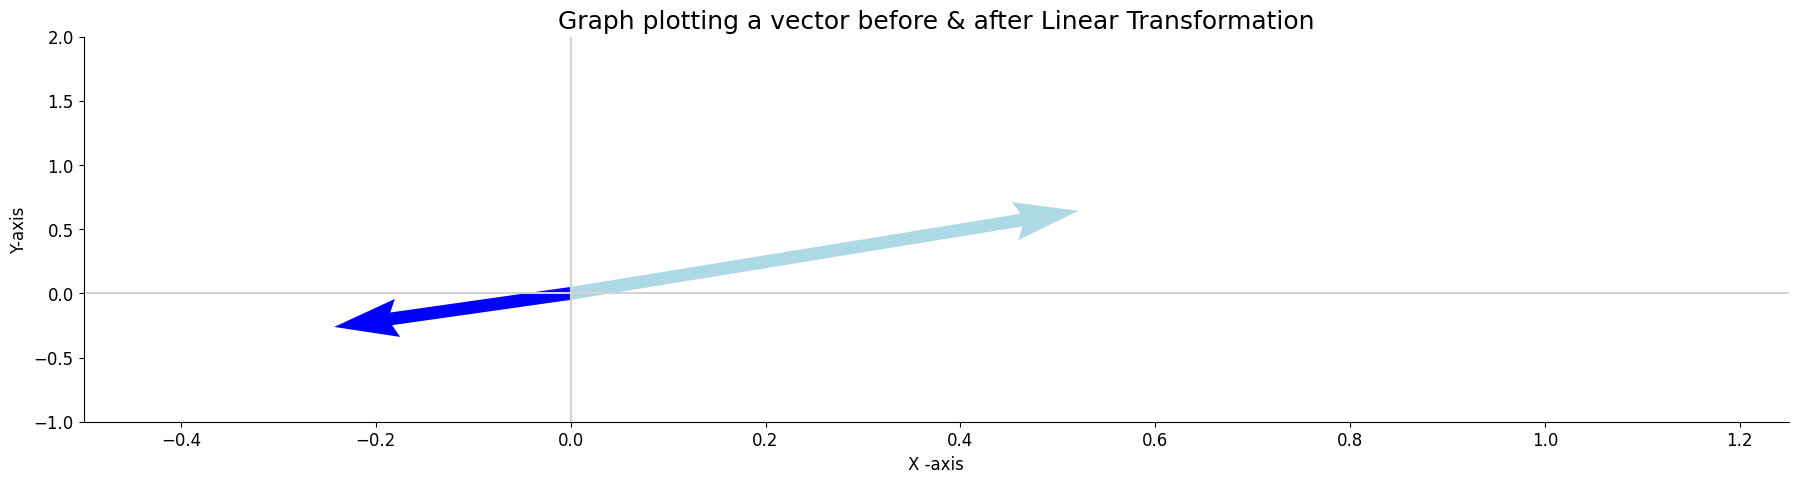

In [35]:
plot_vectors([ vectorfy(np.matrix(inputs_df),0),  eigen_vectors[0]], ['lightblue','blue'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Graph plotting a vector before & after Linear Transformation', fontsize=18)
plt.xlabel('X -axis')
plt.ylabel('Y-axis')
plt.xlim(-0.5, 1.25)
_ = plt.ylim(-1, 2)

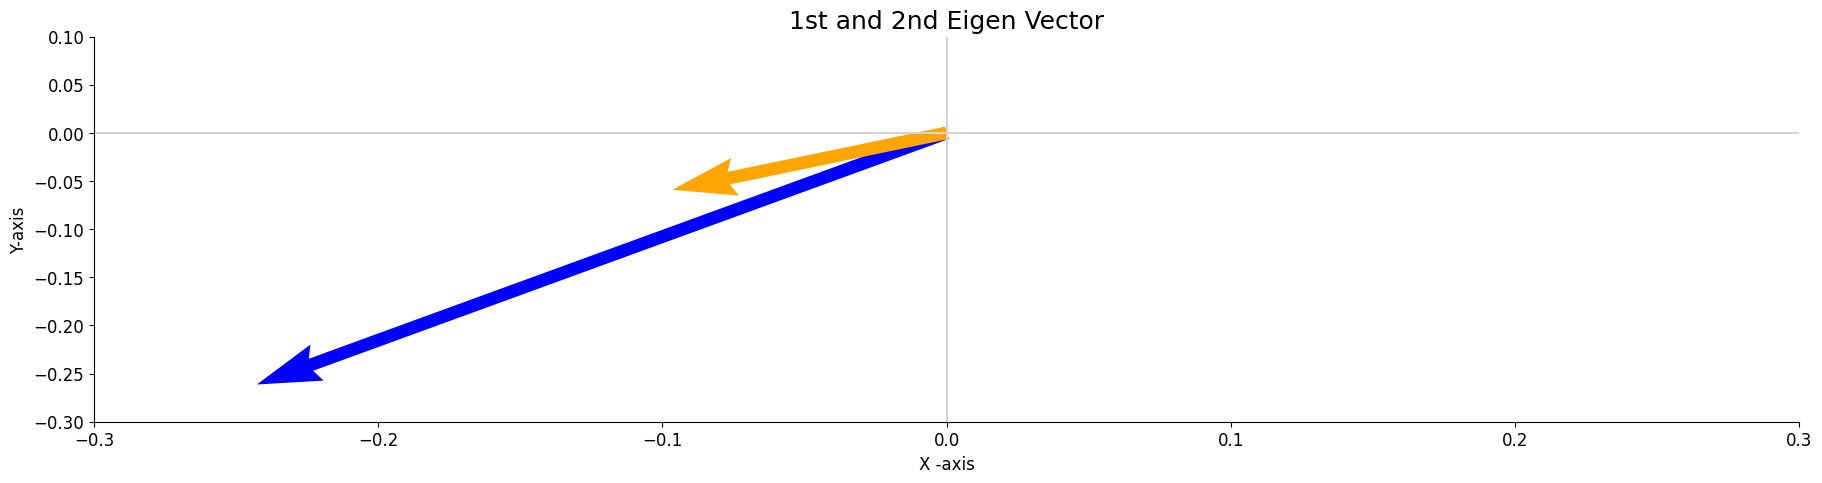

In [36]:
plot_vectors([eigen_vectors[0], eigen_vectors[1]] , ['blue', 'orange'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('1st and 2nd Eigen Vector', fontsize=18)
plt.xlabel('X -axis')
plt.ylabel('Y-axis')
plt.xlim(-0.3, 0.3)
_ = plt.ylim(-0.3, 0.1)

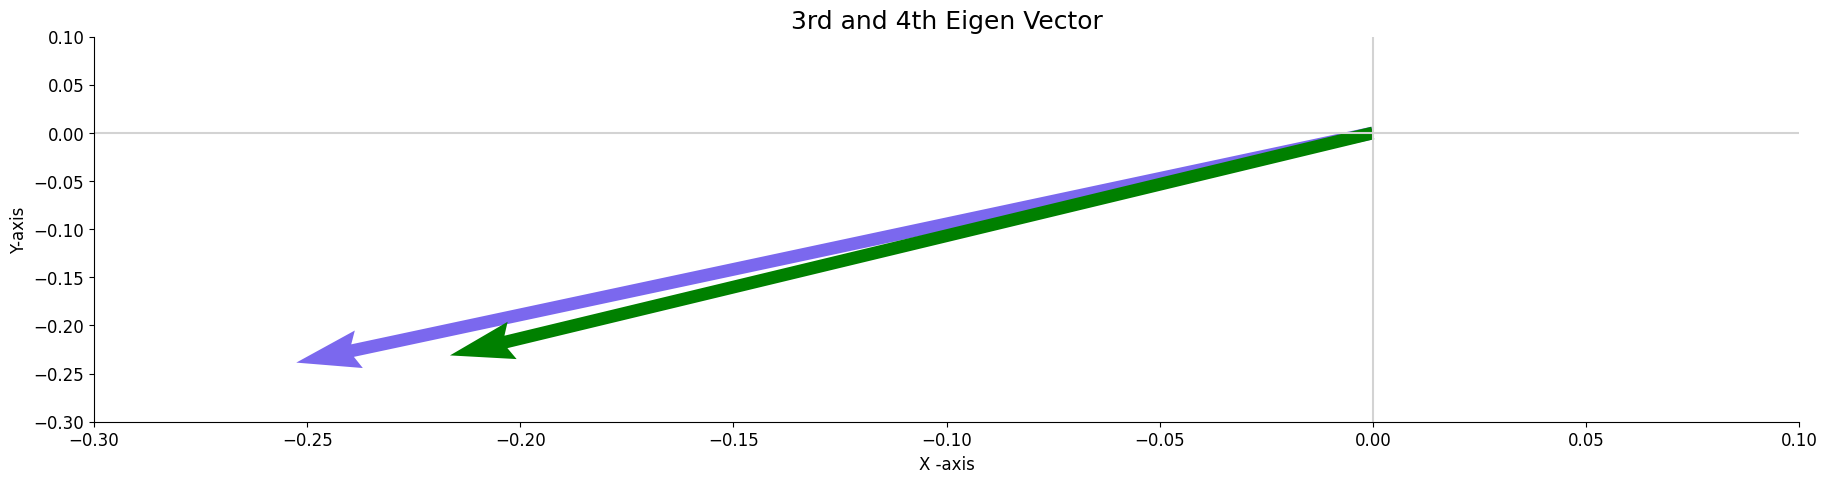

In [37]:
plot_vectors([eigen_vectors[2], eigen_vectors[3]] , ['mediumslateblue', 'green'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('3rd and 4th Eigen Vector', fontsize=18)
plt.xlabel('X -axis')
plt.ylabel('Y-axis')
plt.xlim(-0.3, 0.1)
_ = plt.ylim(-0.3, 0.1)

In [38]:
pc = eigen_vectors[0:6]
print('The Original PC array')
pc[0]

The Original PC array


array([-2.42675774e-01, -2.61316697e-01, -5.95222384e-02,  3.94334569e-02,
       -5.88423544e-04,  2.07022394e-02,  2.42488690e-03, -4.38845905e-02,
        9.75085975e-02,  2.22769562e-01, -8.31524671e-02, -1.19734434e-01,
       -3.89565406e-02, -1.07972318e-01,  1.93030259e-01, -7.30164853e-02,
        2.97307938e-01, -1.47147813e-02,  3.38169231e-02, -4.54114194e-02,
        6.29772186e-02, -1.38267325e-01, -7.05072198e-01, -1.96766318e-01,
       -1.47132741e-01, -1.30574879e-01,  1.54107718e-01, -9.73681525e-02,
        5.86339157e-02, -5.57071438e-02])

In [39]:
print('The Transpose of PC array')
pc.T[0]

The Transpose of PC array


array([-0.24267577, -0.09647861, -0.25255017, -0.21649453, -0.10969462,
       -0.2403976 ])

In [40]:
transformed_df = np.dot(df.iloc[:,0:30],pc.T)
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2','PC3', 'PC4', 'PC5', 'PC6'])
new_df['Target'] = df['target'].values
new_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,Target
0,-520.188331,68.360773,-583.967183,965.938950,-125.514544,107.218277,0
1,-472.002225,63.725168,-560.812348,962.732088,-92.886364,112.571279,0
2,-426.933982,62.458621,-484.250303,842.866511,-99.523851,102.491067,0
3,-184.853863,44.017546,-136.342174,277.754370,-30.916892,38.412925,0
4,-394.181870,60.226364,-429.655025,790.215736,-105.788586,95.896057,0


In [41]:
new_df['Target'] = new_df['Target'].astype('int')

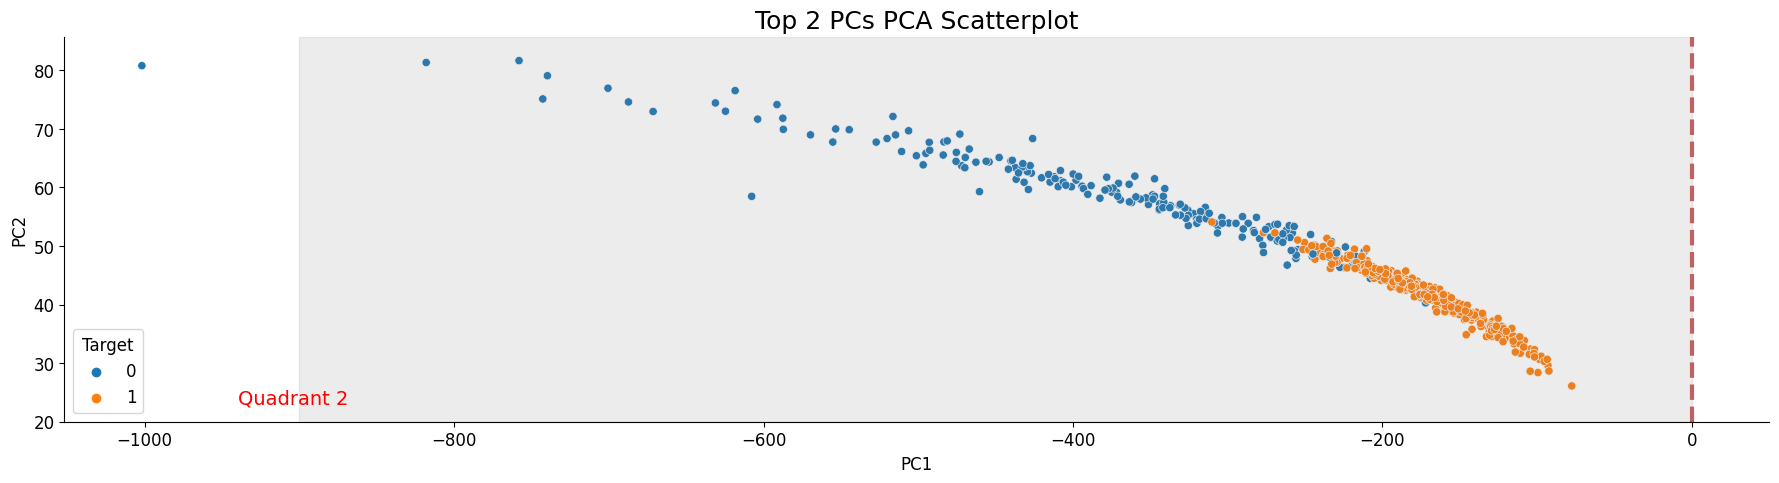

In [42]:
sns.scatterplot(data= new_df,
                 x=new_df['PC1'],
                 y=new_df['PC2'],
               hue=new_df['Target'])
plt.title('Top 2 PCs PCA Scatterplot', fontsize=18)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.axhline(0, linestyle='--', lw=3, zorder=1, color='lightgray')
plt.axvline(0, linestyle='--', lw=3, zorder=1, color='indianred')
plt.axvspan(0,-900, alpha=0.15, zorder=1, color='gray')

plt.annotate(f'Quadrant 2', (-940, 23), fontsize=14,color='red')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.ylim(20)
plt.show()

In [43]:
#Creating a dictionary using a for loop for class weights
class_weight = {}

for i in range(len(np.unique(targets))):
    #for x in [np.around((len(targets[targets==i]))/(targets.shape[0]),4)]     #Actual Weights

    for x in [1/len(np.unique(targets))]:               #Since we want equal weights to be given to classes
        class_weight[i] = x

print('=== CLASS WEIGHT ===')
print(class_weight)

=== CLASS WEIGHT ===
{0: 0.5, 1: 0.5}


In [44]:
#Splitting the data into train and validation set
train_inputs, val_inputs, train_targets, val_targets = train_test_split(new_df, targets, test_size=0.25, random_state=42)

In [45]:
print('X_train Shape -',train_inputs.shape,',', 'y_train Shape -', train_targets.shape)
print('X_test shape -', val_inputs.shape,',','y_test shape -', val_targets.shape)

X_train Shape - (426, 7) , y_train Shape - (426,)
X_test shape - (143, 7) , y_test shape - (143,)


In [46]:
names = ['Logistic Regression', "KNN", "Linear SVM","Gradient Boosting", "Decision Tree", "Random_Forest"]
classifiers = [
    LogisticRegression(solver='liblinear', class_weight=class_weight, random_state=42),
    KNeighborsClassifier(n_neighbors=3, weights= 'distance'),
    SVC(kernel="linear", C=0.025, class_weight=class_weight, random_state=42),
    GradientBoostingClassifier(n_estimators=100, random_state=42),
    DecisionTreeClassifier(max_depth=5, class_weight=class_weight, random_state=42),
    RandomForestClassifier(max_depth=5, n_estimators=100, class_weight=class_weight, random_state=42)]

In [47]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(train_inputs, train_targets)
    score = clf.score(val_inputs, val_targets)
    scores.append(score)
scores_df = pd.DataFrame()
scores_df['name'] = names
scores_df['score'] = np.around(scores,3)
scores_df.sort_values('score', ascending= False)

,name,score
0,Logistic Regression,1.000
3,Gradient Boosting,1.000
4,Decision Tree,1.000
5,Random_Forest,1.000
2,Linear SVM,0.993
1,KNN,0.937


In [48]:
#Initiating the model
model = LogisticRegression(solver='liblinear', random_state=42,  n_jobs=-1, class_weight=class_weight)

#fitting the model
model.fit(train_inputs, train_targets)

#making the predictions
LRtrain_preds = model.predict(train_inputs)

#Creating the confusion matrix
confusionmatrix = np.around(confusion_matrix(train_targets, LRtrain_preds, normalize='true'),3)

#Plotting the Confusion Matrix
fig = px.imshow(confusionmatrix, template='ggplot2',text_auto=True, aspect="auto",
                labels=dict(x="Predicted Label", y="Correct Label", color='Value'))
fig.update_xaxes(side="bottom")
fig.show()

In [49]:
sns.countplot(train_targets[train_targets != LRtrain_preds])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("Misclassification Plot", fontsize=18)
plt.xlabel('Misclassified Labels')
plt.ylabel('Count')
plt.show()

KeyError: ignored

In [50]:
print(classification_report(train_targets, LRtrain_preds))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       158
           1       1.00      1.00      1.00       268

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426



In [51]:
print(len(train_targets[train_targets != LRtrain_preds]),'cases out of', len(train_targets),
      'cases are being misclassified by the Logistic Regression model which gives us an error rate of',
      np.around((len(train_targets[train_targets != LRtrain_preds])/len(train_targets)*100),3))

1 cases out of 426 cases are being misclassified by the Logistic Regression model which gives us an error rate of 0.235


# **LDA**

In [52]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [53]:
# Create an instance of LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
# Fit the model to the data and transform the data using the fit
X_lda = lda.fit_transform(X, y)
# Print the shape of the original data and the transformed data
print("Original Data shape:",X.shape, "\nModified Data shape:", X_lda.shape)

Original Data shape: (569, 30) 
Modified Data shape: (569, 1)


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)

In [55]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [56]:
LDAtrain_preds = lda.predict(X_train)
confusionmatrix = np.around(confusion_matrix(y_train, LDAtrain_preds, normalize='true'),3)

#Plotting the Confusion Matrix
fig = px.imshow(confusionmatrix,
                template='simple_white',
                text_auto=True,
                aspect="auto",
                labels=dict(x="Predicted Label", y="Correct Label", color='Value'))
fig.update_xaxes(side="bottom")
fig.show()

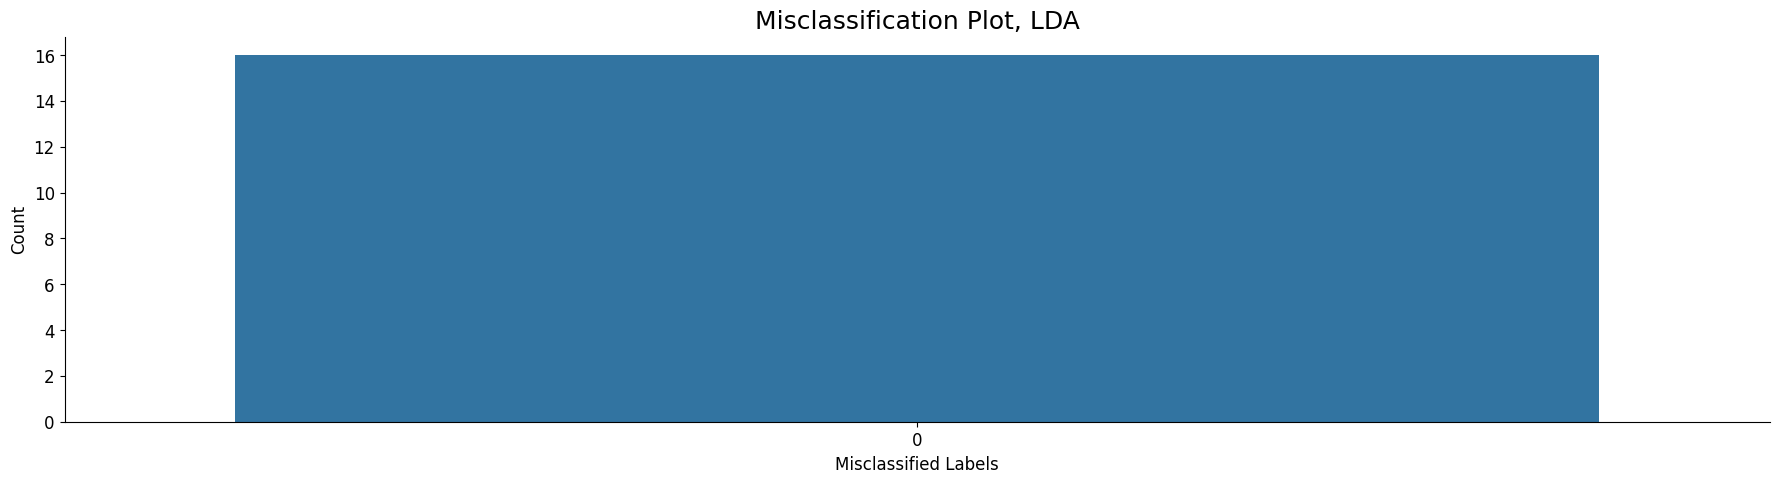

In [57]:
sns.countplot(y_train[y_train!=LDAtrain_preds])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("Misclassification Plot, LDA", fontsize=18)
plt.xlabel('Misclassified Labels')
plt.ylabel('Count')
plt.show()

In [58]:
print(len(y_train[y_train!=LDAtrain_preds]),'cases out of', len(y_train),
      'cases are being misclassified by the LDA which gives us an error rate of',
      np.around((len(y_train[y_train!=LDAtrain_preds])/len(y_train)*100),3))

16 cases out of 455 cases are being misclassified by the LDA which gives us an error rate of 3.516
